In [116]:
#!pip -qqq install dtreeviz

# Imports

In [117]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
from utils import train_and_search, plot_results, handle_param_names
from sklearn.metrics import f1_score
from tqdm import tqdm 
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import classification_report, precision_score, ConfusionMatrixDisplay
from numpy import mean
from imblearn.pipeline import Pipeline

# Loading the dataset

In [118]:
data_bank_preprocessed = pd.read_csv("../dataset/bank-preprocessed.csv", sep=',')
y = data_bank_preprocessed.y
X = data_bank_preprocessed.drop(columns=['y','duration'], axis=1).to_numpy()

In [119]:
data_bank_preprocessed.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [120]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43289    1
43290    1
43291    1
43292    0
43293    0
Name: y, Length: 43294, dtype: int64

In [121]:
# data_train = pd.read_csv("../dataset/train_2.csv", sep=',')
# # X_train = data_train.drop(columns=['y'], axis=1).to_numpy()
# X_train = data_train.drop(columns=['y','duration'], axis=1).to_numpy()
# y_train = data_train.y
# data_test = pd.read_csv("../dataset/test_2.csv", sep=',')
# # X_test = data_test.drop(columns=['y'], axis=1).to_numpy()
# X_test = data_test.drop(columns=['y','duration'], axis=1).to_numpy()
# y_test = data_test.y

# Label encoder 

In [122]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
# y = label_encoder.fit_transform(y_train)

In [123]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [124]:
class_names = list(label_encoder.classes_)    
class_names    

[0, 1]

In [125]:
target_names = {0: 'no',
    1: 'yes'}

In [126]:
SEED = 42

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED, stratify=y)

In [128]:
X_train.shape

(34635, 44)

In [129]:
X_test.shape

(8659, 44)

In [130]:
y_test.shape

(8659,)

# Creating and training the model

In [131]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=SEED)
model = clf.fit(X_train, y_train)

# Evaluating the model

In [132]:
print("Score:", precision_score(y_test, clf.predict(X_test), average="micro"))

print(classification_report(y_test, clf.predict(X_test), target_names=list(target_names.values())))

Score: 0.8335835546829888
              precision    recall  f1-score   support

          no       0.91      0.90      0.91      7652
         yes       0.29      0.30      0.30      1007

    accuracy                           0.83      8659
   macro avg       0.60      0.60      0.60      8659
weighted avg       0.84      0.83      0.83      8659



# Validation

In [133]:
# import numpy as np

# max_depth = np.arange(6, 12)
# #min_weight_fraction_leaf = np.linspace(.0, .5, 10).round(2)
# max_leaf_nodes = np.arange(2, 14)
# min_samples_leaf = np.arange(1, 13)
# splitter = ["best", "random"]
# max_features = ["auto", "sqrt", "log2"]

# print(max_depth)
# #print(min_weight_fraction_leaf)
# print(max_leaf_nodes)
# print(min_samples_leaf)
# print(max_features)

In [134]:
max_depth = np.arange(6, 12)
#min_weight_fraction_leaf = np.linspace(.0, .5, 10).round(2)
max_leaf_nodes = np.arange(2, 14)
min_samples_leaf = np.arange(1, 13)
splitter = ["best", "random"]
max_features = ["auto", "sqrt", "log2"]

print(max_depth)
#print(min_weight_fraction_leaf)
print(max_leaf_nodes)
print(min_samples_leaf)
print(max_features)

[ 6  7  8  9 10 11]
[ 2  3  4  5  6  7  8  9 10 11 12 13]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
['auto', 'sqrt', 'log2']


In [135]:
from itertools import product

search_space = tuple(product(max_depth, max_leaf_nodes, min_samples_leaf, splitter))

print("Amount of training sets that will be validate: ", len(search_space))

Amount of training sets that will be validate:  1728


In [136]:
X_train.shape

(34635, 44)

In [137]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=SEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [138]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=SEED)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [139]:
# sm = SMOTE(random_state=SEED)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [140]:
X_train.shape

(34635, 44)

In [141]:

scores_valid, params = [], []
# Definindo uma barra de progresso:
for max_depth, max_leaf_nodes, min_samples_leaf, splitter in tqdm(search_space, desc="Treinamento: "):
  clf = DecisionTreeClassifier(criterion="entropy", 
                               max_depth=max_depth,
                               #min_weight_fraction_leaf=min_weight_fraction_leaf,
                               max_leaf_nodes=max_leaf_nodes,
                               min_samples_leaf=min_samples_leaf,
                               splitter=splitter,
                               #max_features=max_features,
                               random_state=SEED)
  
  cv = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
  steps = [('model', clf)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, scoring='f1_micro', cv=cv, n_jobs=-1)
  print('Mean f1: %.3f' % mean(scores))

  scores_valid.append(mean(scores))

  params.append(dict(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes,min_samples_leaf=min_samples_leaf,
                                    splitter=splitter
                                    ))


Treinamento:   0%|          | 1/1728 [00:00<19:33,  1.47it/s]

Mean f1: 0.590


Treinamento:   0%|          | 2/1728 [00:01<19:53,  1.45it/s]

Mean f1: 0.590


Treinamento:   0%|          | 3/1728 [00:02<19:41,  1.46it/s]

Mean f1: 0.590


Treinamento:   0%|          | 4/1728 [00:02<18:56,  1.52it/s]

Mean f1: 0.590


Treinamento:   0%|          | 5/1728 [00:03<18:19,  1.57it/s]

Mean f1: 0.590


Treinamento:   0%|          | 6/1728 [00:03<18:36,  1.54it/s]

Mean f1: 0.590


Treinamento:   0%|          | 7/1728 [00:04<18:16,  1.57it/s]

Mean f1: 0.590


Treinamento:   0%|          | 8/1728 [00:05<19:05,  1.50it/s]

Mean f1: 0.590


Treinamento:   1%|          | 9/1728 [00:05<18:47,  1.52it/s]

Mean f1: 0.590


Treinamento:   1%|          | 10/1728 [00:06<19:20,  1.48it/s]

Mean f1: 0.590


Treinamento:   1%|          | 11/1728 [00:07<18:44,  1.53it/s]

Mean f1: 0.590


Treinamento:   1%|          | 12/1728 [00:08<19:49,  1.44it/s]

Mean f1: 0.590


Treinamento:   1%|          | 13/1728 [00:08<19:48,  1.44it/s]

Mean f1: 0.590


Treinamento:   1%|          | 14/1728 [00:09<19:28,  1.47it/s]

Mean f1: 0.590


Treinamento:   1%|          | 15/1728 [00:10<19:21,  1.47it/s]

Mean f1: 0.590


Treinamento:   1%|          | 16/1728 [00:10<19:07,  1.49it/s]

Mean f1: 0.590


Treinamento:   1%|          | 17/1728 [00:11<19:03,  1.50it/s]

Mean f1: 0.590


Treinamento:   1%|          | 18/1728 [00:12<19:38,  1.45it/s]

Mean f1: 0.590


Treinamento:   1%|          | 19/1728 [00:12<19:54,  1.43it/s]

Mean f1: 0.590


Treinamento:   1%|          | 20/1728 [00:13<19:23,  1.47it/s]

Mean f1: 0.590


Treinamento:   1%|          | 21/1728 [00:14<18:54,  1.51it/s]

Mean f1: 0.590


Treinamento:   1%|▏         | 22/1728 [00:14<19:15,  1.48it/s]

Mean f1: 0.590


Treinamento:   1%|▏         | 23/1728 [00:15<19:55,  1.43it/s]

Mean f1: 0.590


Treinamento:   1%|▏         | 24/1728 [00:16<19:20,  1.47it/s]

Mean f1: 0.590


Treinamento:   1%|▏         | 25/1728 [00:16<19:34,  1.45it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 26/1728 [00:17<20:50,  1.36it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 27/1728 [00:18<20:27,  1.39it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 28/1728 [00:19<21:12,  1.34it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 29/1728 [00:20<21:19,  1.33it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 30/1728 [00:20<21:03,  1.34it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 31/1728 [00:21<21:56,  1.29it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 32/1728 [00:22<22:20,  1.27it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 33/1728 [00:23<22:11,  1.27it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 34/1728 [00:23<21:53,  1.29it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 35/1728 [00:24<20:03,  1.41it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 36/1728 [00:25<20:34,  1.37it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 37/1728 [00:26<21:36,  1.30it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 38/1728 [00:26<20:57,  1.34it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 39/1728 [00:27<20:59,  1.34it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 40/1728 [00:28<21:02,  1.34it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 41/1728 [00:29<22:09,  1.27it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 42/1728 [00:29<21:45,  1.29it/s]

Mean f1: 0.604


Treinamento:   2%|▏         | 43/1728 [00:30<22:46,  1.23it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 44/1728 [00:31<21:51,  1.28it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 45/1728 [00:32<22:09,  1.27it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 46/1728 [00:33<22:31,  1.24it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 47/1728 [00:33<21:56,  1.28it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 48/1728 [00:34<21:54,  1.28it/s]

Mean f1: 0.604


Treinamento:   3%|▎         | 49/1728 [00:35<23:08,  1.21it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 50/1728 [00:36<22:54,  1.22it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 51/1728 [00:37<22:43,  1.23it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 52/1728 [00:38<22:37,  1.23it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 53/1728 [00:38<23:43,  1.18it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 54/1728 [00:39<23:29,  1.19it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 55/1728 [00:40<23:16,  1.20it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 56/1728 [00:41<23:13,  1.20it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 57/1728 [00:42<24:18,  1.15it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 58/1728 [00:43<24:24,  1.14it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 59/1728 [00:44<24:50,  1.12it/s]

Mean f1: 0.659


Treinamento:   3%|▎         | 60/1728 [00:45<24:37,  1.13it/s]

Mean f1: 0.659


Treinamento:   4%|▎         | 61/1728 [00:45<24:32,  1.13it/s]

Mean f1: 0.659


Treinamento:   4%|▎         | 62/1728 [00:46<24:17,  1.14it/s]

Mean f1: 0.659


Treinamento:   4%|▎         | 63/1728 [00:47<23:31,  1.18it/s]

Mean f1: 0.659


Treinamento:   4%|▎         | 64/1728 [00:48<24:22,  1.14it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 65/1728 [00:49<24:21,  1.14it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 66/1728 [00:50<24:35,  1.13it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 67/1728 [00:51<23:23,  1.18it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 68/1728 [00:52<24:11,  1.14it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 69/1728 [00:52<23:40,  1.17it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 70/1728 [00:53<24:25,  1.13it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 71/1728 [00:54<24:11,  1.14it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 72/1728 [00:55<24:32,  1.12it/s]

Mean f1: 0.659


Treinamento:   4%|▍         | 73/1728 [00:56<24:04,  1.15it/s]

Mean f1: 0.672


Treinamento:   4%|▍         | 74/1728 [00:57<24:21,  1.13it/s]

Mean f1: 0.672


Treinamento:   4%|▍         | 75/1728 [00:58<24:15,  1.14it/s]

Mean f1: 0.672


Treinamento:   4%|▍         | 76/1728 [00:59<24:38,  1.12it/s]

Mean f1: 0.672


Treinamento:   4%|▍         | 77/1728 [00:59<24:10,  1.14it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 78/1728 [01:00<24:56,  1.10it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 79/1728 [01:01<24:28,  1.12it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 80/1728 [01:02<25:08,  1.09it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 81/1728 [01:03<24:35,  1.12it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 82/1728 [01:04<25:05,  1.09it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 83/1728 [01:05<24:40,  1.11it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 84/1728 [01:06<24:48,  1.10it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 85/1728 [01:07<24:02,  1.14it/s]

Mean f1: 0.672


Treinamento:   5%|▍         | 86/1728 [01:08<24:38,  1.11it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 87/1728 [01:08<24:03,  1.14it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 88/1728 [01:09<24:17,  1.13it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 89/1728 [01:10<23:44,  1.15it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 90/1728 [01:11<23:33,  1.16it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 91/1728 [01:12<24:35,  1.11it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 92/1728 [01:13<24:27,  1.12it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 93/1728 [01:14<23:42,  1.15it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 94/1728 [01:15<23:59,  1.14it/s]

Mean f1: 0.672


Treinamento:   5%|▌         | 95/1728 [01:15<22:44,  1.20it/s]

Mean f1: 0.672


Treinamento:   6%|▌         | 96/1728 [01:16<23:47,  1.14it/s]

Mean f1: 0.672


Treinamento:   6%|▌         | 97/1728 [01:17<23:42,  1.15it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 98/1728 [01:18<24:21,  1.12it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 99/1728 [01:19<22:55,  1.18it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 100/1728 [01:20<24:00,  1.13it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 101/1728 [01:21<24:25,  1.11it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 102/1728 [01:22<24:28,  1.11it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 103/1728 [01:23<23:58,  1.13it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 104/1728 [01:23<23:35,  1.15it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 105/1728 [01:24<24:06,  1.12it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 106/1728 [01:25<24:16,  1.11it/s]

Mean f1: 0.678


Treinamento:   6%|▌         | 107/1728 [01:26<24:29,  1.10it/s]

Mean f1: 0.678


Treinamento:   6%|▋         | 108/1728 [01:27<23:53,  1.13it/s]

Mean f1: 0.678


Treinamento:   6%|▋         | 109/1728 [01:28<24:22,  1.11it/s]

Mean f1: 0.678


Treinamento:   6%|▋         | 110/1728 [01:29<24:02,  1.12it/s]

Mean f1: 0.678


Treinamento:   6%|▋         | 111/1728 [01:30<24:43,  1.09it/s]

Mean f1: 0.678


Treinamento:   6%|▋         | 112/1728 [01:31<24:20,  1.11it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 113/1728 [01:31<23:37,  1.14it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 114/1728 [01:32<24:11,  1.11it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 115/1728 [01:33<23:11,  1.16it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 116/1728 [01:34<24:11,  1.11it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 117/1728 [01:35<24:22,  1.10it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 118/1728 [01:36<24:29,  1.10it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 119/1728 [01:37<23:55,  1.12it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 120/1728 [01:38<24:29,  1.09it/s]

Mean f1: 0.678


Treinamento:   7%|▋         | 121/1728 [01:39<24:27,  1.09it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 122/1728 [01:40<24:42,  1.08it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 123/1728 [01:41<24:43,  1.08it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 124/1728 [01:42<24:46,  1.08it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 125/1728 [01:42<24:48,  1.08it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 126/1728 [01:43<24:31,  1.09it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 127/1728 [01:44<24:24,  1.09it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 128/1728 [01:45<24:18,  1.10it/s]

Mean f1: 0.680


Treinamento:   7%|▋         | 129/1728 [01:46<23:30,  1.13it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 130/1728 [01:47<23:52,  1.12it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 131/1728 [01:48<24:16,  1.10it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 132/1728 [01:49<23:20,  1.14it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 133/1728 [01:50<23:08,  1.15it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 134/1728 [01:50<23:45,  1.12it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 135/1728 [01:51<23:26,  1.13it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 136/1728 [01:52<23:33,  1.13it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 137/1728 [01:53<21:58,  1.21it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 138/1728 [01:54<23:13,  1.14it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 139/1728 [01:55<23:14,  1.14it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 140/1728 [01:56<23:46,  1.11it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 141/1728 [01:57<23:53,  1.11it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 142/1728 [01:58<24:00,  1.10it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 143/1728 [01:59<24:09,  1.09it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 144/1728 [01:59<24:40,  1.07it/s]

Mean f1: 0.680


Treinamento:   8%|▊         | 145/1728 [02:00<23:56,  1.10it/s]

Mean f1: 0.687


Treinamento:   8%|▊         | 146/1728 [02:01<23:41,  1.11it/s]

Mean f1: 0.683


Treinamento:   9%|▊         | 147/1728 [02:02<24:19,  1.08it/s]

Mean f1: 0.687


Treinamento:   9%|▊         | 148/1728 [02:03<24:41,  1.07it/s]

Mean f1: 0.683


Treinamento:   9%|▊         | 149/1728 [02:04<25:08,  1.05it/s]

Mean f1: 0.687


Treinamento:   9%|▊         | 150/1728 [02:05<24:51,  1.06it/s]

Mean f1: 0.683


Treinamento:   9%|▊         | 151/1728 [02:06<24:11,  1.09it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 152/1728 [02:07<24:50,  1.06it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 153/1728 [02:08<24:34,  1.07it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 154/1728 [02:09<23:37,  1.11it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 155/1728 [02:10<23:15,  1.13it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 156/1728 [02:10<23:34,  1.11it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 157/1728 [02:12<24:37,  1.06it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 158/1728 [02:12<24:42,  1.06it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 159/1728 [02:13<24:24,  1.07it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 160/1728 [02:14<24:38,  1.06it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 161/1728 [02:15<24:41,  1.06it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 162/1728 [02:16<24:08,  1.08it/s]

Mean f1: 0.683


Treinamento:   9%|▉         | 163/1728 [02:17<24:13,  1.08it/s]

Mean f1: 0.687


Treinamento:   9%|▉         | 164/1728 [02:18<23:14,  1.12it/s]

Mean f1: 0.683


Treinamento:  10%|▉         | 165/1728 [02:19<23:43,  1.10it/s]

Mean f1: 0.687


Treinamento:  10%|▉         | 166/1728 [02:20<23:35,  1.10it/s]

Mean f1: 0.683


Treinamento:  10%|▉         | 167/1728 [02:21<24:24,  1.07it/s]

Mean f1: 0.687


Treinamento:  10%|▉         | 168/1728 [02:22<24:47,  1.05it/s]

Mean f1: 0.683


Treinamento:  10%|▉         | 169/1728 [02:23<25:08,  1.03it/s]

Mean f1: 0.691


Treinamento:  10%|▉         | 170/1728 [02:24<24:36,  1.06it/s]

Mean f1: 0.686


Treinamento:  10%|▉         | 171/1728 [02:25<23:57,  1.08it/s]

Mean f1: 0.691


Treinamento:  10%|▉         | 172/1728 [02:26<24:27,  1.06it/s]

Mean f1: 0.686


Treinamento:  10%|█         | 173/1728 [02:26<23:19,  1.11it/s]

Mean f1: 0.691


Treinamento:  10%|█         | 174/1728 [02:27<22:42,  1.14it/s]

Mean f1: 0.686


Treinamento:  10%|█         | 175/1728 [02:28<22:40,  1.14it/s]

Mean f1: 0.691


Treinamento:  10%|█         | 176/1728 [02:29<23:31,  1.10it/s]

Mean f1: 0.686


Treinamento:  10%|█         | 177/1728 [02:30<23:43,  1.09it/s]

Mean f1: 0.691


Treinamento:  10%|█         | 178/1728 [02:31<23:51,  1.08it/s]

Mean f1: 0.686


Treinamento:  10%|█         | 179/1728 [02:32<23:15,  1.11it/s]

Mean f1: 0.691


Treinamento:  10%|█         | 180/1728 [02:33<23:32,  1.10it/s]

Mean f1: 0.686


Treinamento:  10%|█         | 181/1728 [02:34<23:34,  1.09it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 182/1728 [02:34<22:56,  1.12it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 183/1728 [02:35<22:11,  1.16it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 184/1728 [02:36<23:15,  1.11it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 185/1728 [02:37<22:41,  1.13it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 186/1728 [02:38<23:14,  1.11it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 187/1728 [02:39<23:12,  1.11it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 188/1728 [02:40<23:27,  1.09it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 189/1728 [02:41<23:26,  1.09it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 190/1728 [02:42<23:24,  1.10it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 191/1728 [02:43<23:13,  1.10it/s]

Mean f1: 0.691


Treinamento:  11%|█         | 192/1728 [02:43<23:06,  1.11it/s]

Mean f1: 0.686


Treinamento:  11%|█         | 193/1728 [02:44<23:17,  1.10it/s]

Mean f1: 0.695


Treinamento:  11%|█         | 194/1728 [02:45<23:33,  1.08it/s]

Mean f1: 0.691


Treinamento:  11%|█▏        | 195/1728 [02:46<22:42,  1.12it/s]

Mean f1: 0.695


Treinamento:  11%|█▏        | 196/1728 [02:47<23:49,  1.07it/s]

Mean f1: 0.691


Treinamento:  11%|█▏        | 197/1728 [02:48<23:54,  1.07it/s]

Mean f1: 0.695


Treinamento:  11%|█▏        | 198/1728 [02:49<23:32,  1.08it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 199/1728 [02:50<23:52,  1.07it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 200/1728 [02:51<23:48,  1.07it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 201/1728 [02:52<23:35,  1.08it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 202/1728 [02:53<23:37,  1.08it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 203/1728 [02:54<23:30,  1.08it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 204/1728 [02:55<23:51,  1.06it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 205/1728 [02:56<23:42,  1.07it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 206/1728 [02:56<23:42,  1.07it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 207/1728 [02:57<22:53,  1.11it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 208/1728 [02:58<22:51,  1.11it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 209/1728 [02:59<23:26,  1.08it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 210/1728 [03:00<23:28,  1.08it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 211/1728 [03:01<23:29,  1.08it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 212/1728 [03:02<23:39,  1.07it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 213/1728 [03:03<23:34,  1.07it/s]

Mean f1: 0.695


Treinamento:  12%|█▏        | 214/1728 [03:04<23:36,  1.07it/s]

Mean f1: 0.691


Treinamento:  12%|█▏        | 215/1728 [03:05<22:37,  1.11it/s]

Mean f1: 0.695


Treinamento:  12%|█▎        | 216/1728 [03:06<23:31,  1.07it/s]

Mean f1: 0.691


Treinamento:  13%|█▎        | 217/1728 [03:07<22:37,  1.11it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 218/1728 [03:08<23:09,  1.09it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 219/1728 [03:08<23:19,  1.08it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 220/1728 [03:09<23:09,  1.09it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 221/1728 [03:10<23:37,  1.06it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 222/1728 [03:11<23:55,  1.05it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 223/1728 [03:12<23:32,  1.07it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 224/1728 [03:13<23:41,  1.06it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 225/1728 [03:14<22:57,  1.09it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 226/1728 [03:15<23:04,  1.08it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 227/1728 [03:16<22:58,  1.09it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 228/1728 [03:17<23:11,  1.08it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 229/1728 [03:18<23:08,  1.08it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 230/1728 [03:19<22:33,  1.11it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 231/1728 [03:19<22:13,  1.12it/s]

Mean f1: 0.697


Treinamento:  13%|█▎        | 232/1728 [03:20<23:03,  1.08it/s]

Mean f1: 0.694


Treinamento:  13%|█▎        | 233/1728 [03:21<23:16,  1.07it/s]

Mean f1: 0.697


Treinamento:  14%|█▎        | 234/1728 [03:22<22:34,  1.10it/s]

Mean f1: 0.694


Treinamento:  14%|█▎        | 235/1728 [03:23<22:24,  1.11it/s]

Mean f1: 0.697


Treinamento:  14%|█▎        | 236/1728 [03:24<23:07,  1.08it/s]

Mean f1: 0.694


Treinamento:  14%|█▎        | 237/1728 [03:25<23:01,  1.08it/s]

Mean f1: 0.697


Treinamento:  14%|█▍        | 238/1728 [03:26<22:58,  1.08it/s]

Mean f1: 0.694


Treinamento:  14%|█▍        | 239/1728 [03:27<23:06,  1.07it/s]

Mean f1: 0.697


Treinamento:  14%|█▍        | 240/1728 [03:28<22:42,  1.09it/s]

Mean f1: 0.694


Treinamento:  14%|█▍        | 241/1728 [03:29<22:57,  1.08it/s]

Mean f1: 0.698


Treinamento:  14%|█▍        | 242/1728 [03:30<23:30,  1.05it/s]

Mean f1: 0.696


Treinamento:  14%|█▍        | 243/1728 [03:31<22:36,  1.09it/s]

Mean f1: 0.698


Treinamento:  14%|█▍        | 244/1728 [03:32<22:53,  1.08it/s]

Mean f1: 0.696


Treinamento:  14%|█▍        | 245/1728 [03:33<23:04,  1.07it/s]

Mean f1: 0.698


Treinamento:  14%|█▍        | 246/1728 [03:33<22:58,  1.08it/s]

Mean f1: 0.696


Treinamento:  14%|█▍        | 247/1728 [03:34<22:44,  1.09it/s]

Mean f1: 0.698


Treinamento:  14%|█▍        | 248/1728 [03:35<23:01,  1.07it/s]

Mean f1: 0.696


Treinamento:  14%|█▍        | 249/1728 [03:36<22:06,  1.11it/s]

Mean f1: 0.698


Treinamento:  14%|█▍        | 250/1728 [03:37<21:49,  1.13it/s]

Mean f1: 0.696


Treinamento:  15%|█▍        | 251/1728 [03:38<22:27,  1.10it/s]

Mean f1: 0.698


Treinamento:  15%|█▍        | 252/1728 [03:39<22:52,  1.08it/s]

Mean f1: 0.696


Treinamento:  15%|█▍        | 253/1728 [03:40<22:51,  1.08it/s]

Mean f1: 0.698


Treinamento:  15%|█▍        | 254/1728 [03:41<22:59,  1.07it/s]

Mean f1: 0.696


Treinamento:  15%|█▍        | 255/1728 [03:42<22:51,  1.07it/s]

Mean f1: 0.698


Treinamento:  15%|█▍        | 256/1728 [03:43<23:01,  1.07it/s]

Mean f1: 0.696


Treinamento:  15%|█▍        | 257/1728 [03:44<23:13,  1.06it/s]

Mean f1: 0.698


Treinamento:  15%|█▍        | 258/1728 [03:44<22:24,  1.09it/s]

Mean f1: 0.696


Treinamento:  15%|█▍        | 259/1728 [03:45<22:33,  1.09it/s]

Mean f1: 0.698


Treinamento:  15%|█▌        | 260/1728 [03:46<21:51,  1.12it/s]

Mean f1: 0.696


Treinamento:  15%|█▌        | 261/1728 [03:47<22:04,  1.11it/s]

Mean f1: 0.698


Treinamento:  15%|█▌        | 262/1728 [03:48<21:46,  1.12it/s]

Mean f1: 0.696


Treinamento:  15%|█▌        | 263/1728 [03:49<22:40,  1.08it/s]

Mean f1: 0.698


Treinamento:  15%|█▌        | 264/1728 [03:50<22:10,  1.10it/s]

Mean f1: 0.696


Treinamento:  15%|█▌        | 265/1728 [03:51<22:41,  1.07it/s]

Mean f1: 0.700


Treinamento:  15%|█▌        | 266/1728 [03:52<23:07,  1.05it/s]

Mean f1: 0.696


Treinamento:  15%|█▌        | 267/1728 [03:53<22:24,  1.09it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 268/1728 [03:54<21:58,  1.11it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 269/1728 [03:54<21:23,  1.14it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 270/1728 [03:55<21:40,  1.12it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 271/1728 [03:56<21:06,  1.15it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 272/1728 [03:57<21:12,  1.14it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 273/1728 [03:58<21:27,  1.13it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 274/1728 [03:59<21:41,  1.12it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 275/1728 [04:00<21:58,  1.10it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 276/1728 [04:01<22:24,  1.08it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 277/1728 [04:02<21:38,  1.12it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 278/1728 [04:03<22:22,  1.08it/s]

Mean f1: 0.696


Treinamento:  16%|█▌        | 279/1728 [04:03<22:13,  1.09it/s]

Mean f1: 0.700


Treinamento:  16%|█▌        | 280/1728 [04:04<22:27,  1.07it/s]

Mean f1: 0.696


Treinamento:  16%|█▋        | 281/1728 [04:05<22:12,  1.09it/s]

Mean f1: 0.700


Treinamento:  16%|█▋        | 282/1728 [04:06<22:40,  1.06it/s]

Mean f1: 0.696


Treinamento:  16%|█▋        | 283/1728 [04:07<21:55,  1.10it/s]

Mean f1: 0.700


Treinamento:  16%|█▋        | 284/1728 [04:08<22:33,  1.07it/s]

Mean f1: 0.696


Treinamento:  16%|█▋        | 285/1728 [04:09<21:41,  1.11it/s]

Mean f1: 0.700


Treinamento:  17%|█▋        | 286/1728 [04:10<21:56,  1.10it/s]

Mean f1: 0.696


Treinamento:  17%|█▋        | 287/1728 [04:11<22:05,  1.09it/s]

Mean f1: 0.700


Treinamento:  17%|█▋        | 288/1728 [04:12<22:19,  1.08it/s]

Mean f1: 0.696


Treinamento:  17%|█▋        | 289/1728 [04:12<19:35,  1.22it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 290/1728 [04:13<18:52,  1.27it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 291/1728 [04:14<17:16,  1.39it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 292/1728 [04:14<16:53,  1.42it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 293/1728 [04:15<15:54,  1.50it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 294/1728 [04:16<16:08,  1.48it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 295/1728 [04:16<15:56,  1.50it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 296/1728 [04:17<15:26,  1.55it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 297/1728 [04:18<15:28,  1.54it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 298/1728 [04:18<14:58,  1.59it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 299/1728 [04:19<15:23,  1.55it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 300/1728 [04:19<15:41,  1.52it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 301/1728 [04:20<14:54,  1.60it/s]

Mean f1: 0.590


Treinamento:  17%|█▋        | 302/1728 [04:21<15:03,  1.58it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 303/1728 [04:21<14:44,  1.61it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 304/1728 [04:22<15:14,  1.56it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 305/1728 [04:23<14:39,  1.62it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 306/1728 [04:23<14:42,  1.61it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 307/1728 [04:24<14:48,  1.60it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 308/1728 [04:24<15:07,  1.57it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 309/1728 [04:25<14:33,  1.62it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 310/1728 [04:26<15:22,  1.54it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 311/1728 [04:26<15:27,  1.53it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 312/1728 [04:27<14:47,  1.60it/s]

Mean f1: 0.590


Treinamento:  18%|█▊        | 313/1728 [04:28<15:02,  1.57it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 314/1728 [04:28<15:57,  1.48it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 315/1728 [04:29<15:47,  1.49it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 316/1728 [04:30<16:48,  1.40it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 317/1728 [04:31<16:15,  1.45it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 318/1728 [04:31<17:13,  1.36it/s]

Mean f1: 0.604


Treinamento:  18%|█▊        | 319/1728 [04:32<16:41,  1.41it/s]

Mean f1: 0.604


Treinamento:  19%|█▊        | 320/1728 [04:33<16:13,  1.45it/s]

Mean f1: 0.604


Treinamento:  19%|█▊        | 321/1728 [04:33<15:58,  1.47it/s]

Mean f1: 0.604


Treinamento:  19%|█▊        | 322/1728 [04:34<16:49,  1.39it/s]

Mean f1: 0.604


Treinamento:  19%|█▊        | 323/1728 [04:35<16:43,  1.40it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 324/1728 [04:35<16:33,  1.41it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 325/1728 [04:36<16:25,  1.42it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 326/1728 [04:37<16:49,  1.39it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 327/1728 [04:38<17:03,  1.37it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 328/1728 [04:38<16:40,  1.40it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 329/1728 [04:39<16:26,  1.42it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 330/1728 [04:40<17:06,  1.36it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 331/1728 [04:41<17:29,  1.33it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 332/1728 [04:41<16:49,  1.38it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 333/1728 [04:42<16:32,  1.41it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 334/1728 [04:43<16:34,  1.40it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 335/1728 [04:43<15:48,  1.47it/s]

Mean f1: 0.604


Treinamento:  19%|█▉        | 336/1728 [04:44<16:44,  1.39it/s]

Mean f1: 0.604


Treinamento:  20%|█▉        | 337/1728 [04:45<17:30,  1.32it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 338/1728 [04:46<18:01,  1.29it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 339/1728 [04:47<17:41,  1.31it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 340/1728 [04:47<18:10,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 341/1728 [04:48<18:13,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 342/1728 [04:49<18:46,  1.23it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 343/1728 [04:50<18:09,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 344/1728 [04:51<18:43,  1.23it/s]

Mean f1: 0.659


Treinamento:  20%|█▉        | 345/1728 [04:51<18:45,  1.23it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 346/1728 [04:52<18:08,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 347/1728 [04:53<17:34,  1.31it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 348/1728 [04:54<18:02,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 349/1728 [04:55<18:36,  1.23it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 350/1728 [04:55<18:15,  1.26it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 351/1728 [04:56<17:50,  1.29it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 352/1728 [04:57<18:31,  1.24it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 353/1728 [04:58<18:00,  1.27it/s]

Mean f1: 0.659


Treinamento:  20%|██        | 354/1728 [04:59<18:26,  1.24it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 355/1728 [04:59<17:56,  1.28it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 356/1728 [05:00<18:30,  1.24it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 357/1728 [05:01<17:57,  1.27it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 358/1728 [05:02<17:55,  1.27it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 359/1728 [05:02<17:31,  1.30it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 360/1728 [05:03<18:10,  1.25it/s]

Mean f1: 0.659


Treinamento:  21%|██        | 361/1728 [05:04<17:52,  1.27it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 362/1728 [05:05<17:58,  1.27it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 363/1728 [05:06<17:46,  1.28it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 364/1728 [05:06<17:41,  1.28it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 365/1728 [05:07<17:39,  1.29it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 366/1728 [05:08<18:33,  1.22it/s]

Mean f1: 0.672


Treinamento:  21%|██        | 367/1728 [05:09<18:54,  1.20it/s]

Mean f1: 0.672


Treinamento:  21%|██▏       | 368/1728 [05:10<19:06,  1.19it/s]

Mean f1: 0.672


Treinamento:  21%|██▏       | 369/1728 [05:11<18:26,  1.23it/s]

Mean f1: 0.672


Treinamento:  21%|██▏       | 370/1728 [05:11<18:06,  1.25it/s]

Mean f1: 0.672


Treinamento:  21%|██▏       | 371/1728 [05:12<18:13,  1.24it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 372/1728 [05:13<18:58,  1.19it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 373/1728 [05:14<18:51,  1.20it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 374/1728 [05:15<18:56,  1.19it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 375/1728 [05:16<18:49,  1.20it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 376/1728 [05:16<18:30,  1.22it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 377/1728 [05:17<19:03,  1.18it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 378/1728 [05:18<19:14,  1.17it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 379/1728 [05:19<18:18,  1.23it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 380/1728 [05:20<18:48,  1.19it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 381/1728 [05:21<18:39,  1.20it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 382/1728 [05:21<18:55,  1.19it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 383/1728 [05:22<19:03,  1.18it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 384/1728 [05:23<19:23,  1.15it/s]

Mean f1: 0.672


Treinamento:  22%|██▏       | 385/1728 [05:24<19:16,  1.16it/s]

Mean f1: 0.678


Treinamento:  22%|██▏       | 386/1728 [05:25<19:19,  1.16it/s]

Mean f1: 0.678


Treinamento:  22%|██▏       | 387/1728 [05:26<19:13,  1.16it/s]

Mean f1: 0.678


Treinamento:  22%|██▏       | 388/1728 [05:27<19:30,  1.15it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 389/1728 [05:28<19:36,  1.14it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 390/1728 [05:28<19:46,  1.13it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 391/1728 [05:29<19:52,  1.12it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 392/1728 [05:30<19:20,  1.15it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 393/1728 [05:31<19:20,  1.15it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 394/1728 [05:32<19:29,  1.14it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 395/1728 [05:33<18:50,  1.18it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 396/1728 [05:34<19:16,  1.15it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 397/1728 [05:34<18:35,  1.19it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 398/1728 [05:35<18:51,  1.18it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 399/1728 [05:36<18:44,  1.18it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 400/1728 [05:37<18:51,  1.17it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 401/1728 [05:38<19:13,  1.15it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 402/1728 [05:39<19:49,  1.12it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 403/1728 [05:40<19:48,  1.12it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 404/1728 [05:41<19:50,  1.11it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 405/1728 [05:41<19:04,  1.16it/s]

Mean f1: 0.678


Treinamento:  23%|██▎       | 406/1728 [05:42<18:34,  1.19it/s]

Mean f1: 0.678


Treinamento:  24%|██▎       | 407/1728 [05:43<19:19,  1.14it/s]

Mean f1: 0.678


Treinamento:  24%|██▎       | 408/1728 [05:44<19:01,  1.16it/s]

Mean f1: 0.678


Treinamento:  24%|██▎       | 409/1728 [05:45<18:53,  1.16it/s]

Mean f1: 0.680


Treinamento:  24%|██▎       | 410/1728 [05:46<18:36,  1.18it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 411/1728 [05:47<18:44,  1.17it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 412/1728 [05:47<18:30,  1.19it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 413/1728 [05:48<19:16,  1.14it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 414/1728 [05:49<18:54,  1.16it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 415/1728 [05:50<18:17,  1.20it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 416/1728 [05:51<19:07,  1.14it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 417/1728 [05:52<19:16,  1.13it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 418/1728 [05:53<19:36,  1.11it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 419/1728 [05:54<19:31,  1.12it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 420/1728 [05:54<18:48,  1.16it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 421/1728 [05:55<19:11,  1.13it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 422/1728 [05:56<19:11,  1.13it/s]

Mean f1: 0.680


Treinamento:  24%|██▍       | 423/1728 [05:57<19:11,  1.13it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 424/1728 [05:58<18:39,  1.17it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 425/1728 [05:59<19:04,  1.14it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 426/1728 [06:00<19:18,  1.12it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 427/1728 [06:01<18:49,  1.15it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 428/1728 [06:01<19:10,  1.13it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 429/1728 [06:02<18:56,  1.14it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 430/1728 [06:03<18:21,  1.18it/s]

Mean f1: 0.680


Treinamento:  25%|██▍       | 431/1728 [06:04<18:45,  1.15it/s]

Mean f1: 0.680


Treinamento:  25%|██▌       | 432/1728 [06:05<18:41,  1.16it/s]

Mean f1: 0.680


Treinamento:  25%|██▌       | 433/1728 [06:06<19:08,  1.13it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 434/1728 [06:07<19:22,  1.11it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 435/1728 [06:08<19:07,  1.13it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 436/1728 [06:08<18:32,  1.16it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 437/1728 [06:09<17:56,  1.20it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 438/1728 [06:10<17:52,  1.20it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 439/1728 [06:11<18:09,  1.18it/s]

Mean f1: 0.681


Treinamento:  25%|██▌       | 440/1728 [06:12<17:59,  1.19it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 441/1728 [06:13<18:28,  1.16it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 442/1728 [06:13<18:33,  1.15it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 443/1728 [06:14<17:55,  1.20it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 444/1728 [06:15<18:10,  1.18it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 445/1728 [06:16<18:28,  1.16it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 446/1728 [06:17<18:52,  1.13it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 447/1728 [06:18<18:50,  1.13it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 448/1728 [06:19<18:57,  1.12it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 449/1728 [06:20<18:45,  1.14it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 450/1728 [06:20<18:49,  1.13it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 451/1728 [06:21<18:53,  1.13it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 452/1728 [06:22<18:27,  1.15it/s]

Mean f1: 0.681


Treinamento:  26%|██▌       | 453/1728 [06:23<18:59,  1.12it/s]

Mean f1: 0.681


Treinamento:  26%|██▋       | 454/1728 [06:24<18:59,  1.12it/s]

Mean f1: 0.681


Treinamento:  26%|██▋       | 455/1728 [06:25<18:56,  1.12it/s]

Mean f1: 0.681


Treinamento:  26%|██▋       | 456/1728 [06:26<19:02,  1.11it/s]

Mean f1: 0.681


Treinamento:  26%|██▋       | 457/1728 [06:27<19:15,  1.10it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 458/1728 [06:28<19:10,  1.10it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 459/1728 [06:29<19:04,  1.11it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 460/1728 [06:30<19:07,  1.11it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 461/1728 [06:30<18:56,  1.11it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 462/1728 [06:31<18:23,  1.15it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 463/1728 [06:32<18:54,  1.11it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 464/1728 [06:33<19:06,  1.10it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 465/1728 [06:34<18:19,  1.15it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 466/1728 [06:35<18:24,  1.14it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 467/1728 [06:36<17:52,  1.18it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 468/1728 [06:36<18:02,  1.16it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 469/1728 [06:37<17:54,  1.17it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 470/1728 [06:38<18:35,  1.13it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 471/1728 [06:39<17:43,  1.18it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 472/1728 [06:40<18:23,  1.14it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 473/1728 [06:41<18:14,  1.15it/s]

Mean f1: 0.687


Treinamento:  27%|██▋       | 474/1728 [06:42<18:33,  1.13it/s]

Mean f1: 0.684


Treinamento:  27%|██▋       | 475/1728 [06:43<18:37,  1.12it/s]

Mean f1: 0.687


Treinamento:  28%|██▊       | 476/1728 [06:44<18:41,  1.12it/s]

Mean f1: 0.684


Treinamento:  28%|██▊       | 477/1728 [06:44<18:41,  1.12it/s]

Mean f1: 0.687


Treinamento:  28%|██▊       | 478/1728 [06:45<18:10,  1.15it/s]

Mean f1: 0.684


Treinamento:  28%|██▊       | 479/1728 [06:46<17:52,  1.16it/s]

Mean f1: 0.687


Treinamento:  28%|██▊       | 480/1728 [06:47<17:42,  1.18it/s]

Mean f1: 0.684


Treinamento:  28%|██▊       | 481/1728 [06:48<18:16,  1.14it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 482/1728 [06:49<18:10,  1.14it/s]

Mean f1: 0.688


Treinamento:  28%|██▊       | 483/1728 [06:50<18:05,  1.15it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 484/1728 [06:50<18:07,  1.14it/s]

Mean f1: 0.688


Treinamento:  28%|██▊       | 485/1728 [06:51<18:28,  1.12it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 486/1728 [06:52<18:52,  1.10it/s]

Mean f1: 0.688


Treinamento:  28%|██▊       | 487/1728 [06:53<18:34,  1.11it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 488/1728 [06:54<18:58,  1.09it/s]

Mean f1: 0.688


Treinamento:  28%|██▊       | 489/1728 [06:55<19:00,  1.09it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 490/1728 [06:56<19:21,  1.07it/s]

Mean f1: 0.688


Treinamento:  28%|██▊       | 491/1728 [06:57<19:08,  1.08it/s]

Mean f1: 0.694


Treinamento:  28%|██▊       | 492/1728 [06:58<19:12,  1.07it/s]

Mean f1: 0.688


Treinamento:  29%|██▊       | 493/1728 [06:59<18:56,  1.09it/s]

Mean f1: 0.694


Treinamento:  29%|██▊       | 494/1728 [07:00<18:59,  1.08it/s]

Mean f1: 0.688


Treinamento:  29%|██▊       | 495/1728 [07:01<18:06,  1.13it/s]

Mean f1: 0.694


Treinamento:  29%|██▊       | 496/1728 [07:01<18:25,  1.11it/s]

Mean f1: 0.688


Treinamento:  29%|██▉       | 497/1728 [07:02<18:21,  1.12it/s]

Mean f1: 0.694


Treinamento:  29%|██▉       | 498/1728 [07:03<18:38,  1.10it/s]

Mean f1: 0.688


Treinamento:  29%|██▉       | 499/1728 [07:04<18:03,  1.13it/s]

Mean f1: 0.694


Treinamento:  29%|██▉       | 500/1728 [07:05<18:15,  1.12it/s]

Mean f1: 0.688


Treinamento:  29%|██▉       | 501/1728 [07:06<18:19,  1.12it/s]

Mean f1: 0.694


Treinamento:  29%|██▉       | 502/1728 [07:07<18:49,  1.09it/s]

Mean f1: 0.688


Treinamento:  29%|██▉       | 503/1728 [07:08<18:08,  1.13it/s]

Mean f1: 0.694


Treinamento:  29%|██▉       | 504/1728 [07:09<17:53,  1.14it/s]

Mean f1: 0.688


Treinamento:  29%|██▉       | 505/1728 [07:09<17:43,  1.15it/s]

Mean f1: 0.698


Treinamento:  29%|██▉       | 506/1728 [07:10<18:38,  1.09it/s]

Mean f1: 0.692


Treinamento:  29%|██▉       | 507/1728 [07:11<18:00,  1.13it/s]

Mean f1: 0.698


Treinamento:  29%|██▉       | 508/1728 [07:12<18:47,  1.08it/s]

Mean f1: 0.692


Treinamento:  29%|██▉       | 509/1728 [07:13<18:11,  1.12it/s]

Mean f1: 0.698


Treinamento:  30%|██▉       | 510/1728 [07:14<18:06,  1.12it/s]

Mean f1: 0.692


Treinamento:  30%|██▉       | 511/1728 [07:15<18:33,  1.09it/s]

Mean f1: 0.698


Treinamento:  30%|██▉       | 512/1728 [07:16<18:15,  1.11it/s]

Mean f1: 0.692


Treinamento:  30%|██▉       | 513/1728 [07:17<18:28,  1.10it/s]

Mean f1: 0.698


Treinamento:  30%|██▉       | 514/1728 [07:18<18:37,  1.09it/s]

Mean f1: 0.692


Treinamento:  30%|██▉       | 515/1728 [07:19<18:36,  1.09it/s]

Mean f1: 0.698


Treinamento:  30%|██▉       | 516/1728 [07:20<18:42,  1.08it/s]

Mean f1: 0.692


Treinamento:  30%|██▉       | 517/1728 [07:20<18:30,  1.09it/s]

Mean f1: 0.698


Treinamento:  30%|██▉       | 518/1728 [07:21<18:48,  1.07it/s]

Mean f1: 0.692


Treinamento:  30%|███       | 519/1728 [07:22<18:45,  1.07it/s]

Mean f1: 0.698


Treinamento:  30%|███       | 520/1728 [07:23<18:58,  1.06it/s]

Mean f1: 0.692


Treinamento:  30%|███       | 521/1728 [07:24<18:17,  1.10it/s]

Mean f1: 0.698


Treinamento:  30%|███       | 522/1728 [07:25<18:33,  1.08it/s]

Mean f1: 0.692


Treinamento:  30%|███       | 523/1728 [07:26<18:00,  1.11it/s]

Mean f1: 0.698


Treinamento:  30%|███       | 524/1728 [07:27<18:43,  1.07it/s]

Mean f1: 0.692


Treinamento:  30%|███       | 525/1728 [07:28<18:35,  1.08it/s]

Mean f1: 0.698


Treinamento:  30%|███       | 526/1728 [07:29<18:51,  1.06it/s]

Mean f1: 0.692


Treinamento:  30%|███       | 527/1728 [07:30<18:37,  1.07it/s]

Mean f1: 0.698


Treinamento:  31%|███       | 528/1728 [07:31<18:05,  1.11it/s]

Mean f1: 0.692


Treinamento:  31%|███       | 529/1728 [07:32<18:01,  1.11it/s]

Mean f1: 0.702


Treinamento:  31%|███       | 530/1728 [07:33<18:35,  1.07it/s]

Mean f1: 0.695


Treinamento:  31%|███       | 531/1728 [07:33<18:02,  1.11it/s]

Mean f1: 0.702


Treinamento:  31%|███       | 532/1728 [07:34<18:13,  1.09it/s]

Mean f1: 0.695


Treinamento:  31%|███       | 533/1728 [07:35<18:46,  1.06it/s]

Mean f1: 0.702


Treinamento:  31%|███       | 534/1728 [07:36<18:29,  1.08it/s]

Mean f1: 0.695


Treinamento:  31%|███       | 535/1728 [07:37<18:02,  1.10it/s]

Mean f1: 0.702


Treinamento:  31%|███       | 536/1728 [07:38<18:03,  1.10it/s]

Mean f1: 0.695


Treinamento:  31%|███       | 537/1728 [07:39<17:40,  1.12it/s]

Mean f1: 0.702


Treinamento:  31%|███       | 538/1728 [07:40<18:18,  1.08it/s]

Mean f1: 0.695


Treinamento:  31%|███       | 539/1728 [07:41<18:34,  1.07it/s]

Mean f1: 0.702


Treinamento:  31%|███▏      | 540/1728 [07:42<18:56,  1.04it/s]

Mean f1: 0.695


Treinamento:  31%|███▏      | 541/1728 [07:43<18:54,  1.05it/s]

Mean f1: 0.702


Treinamento:  31%|███▏      | 542/1728 [07:44<19:03,  1.04it/s]

Mean f1: 0.695


Treinamento:  31%|███▏      | 543/1728 [07:45<18:24,  1.07it/s]

Mean f1: 0.702


Treinamento:  31%|███▏      | 544/1728 [07:46<18:53,  1.04it/s]

Mean f1: 0.695


Treinamento:  32%|███▏      | 545/1728 [07:46<18:10,  1.08it/s]

Mean f1: 0.702


Treinamento:  32%|███▏      | 546/1728 [07:47<18:37,  1.06it/s]

Mean f1: 0.695


Treinamento:  32%|███▏      | 547/1728 [07:48<18:37,  1.06it/s]

Mean f1: 0.702


Treinamento:  32%|███▏      | 548/1728 [07:49<19:08,  1.03it/s]

Mean f1: 0.695


Treinamento:  32%|███▏      | 549/1728 [07:50<18:47,  1.05it/s]

Mean f1: 0.702


Treinamento:  32%|███▏      | 550/1728 [07:51<18:17,  1.07it/s]

Mean f1: 0.695


Treinamento:  32%|███▏      | 551/1728 [07:52<18:18,  1.07it/s]

Mean f1: 0.702


Treinamento:  32%|███▏      | 552/1728 [07:53<18:38,  1.05it/s]

Mean f1: 0.695


Treinamento:  32%|███▏      | 553/1728 [07:54<18:44,  1.04it/s]

Mean f1: 0.704


Treinamento:  32%|███▏      | 554/1728 [07:55<18:26,  1.06it/s]

Mean f1: 0.698


Treinamento:  32%|███▏      | 555/1728 [07:56<18:46,  1.04it/s]

Mean f1: 0.704


Treinamento:  32%|███▏      | 556/1728 [07:57<19:05,  1.02it/s]

Mean f1: 0.698


Treinamento:  32%|███▏      | 557/1728 [07:58<18:52,  1.03it/s]

Mean f1: 0.704


Treinamento:  32%|███▏      | 558/1728 [07:59<18:38,  1.05it/s]

Mean f1: 0.698


Treinamento:  32%|███▏      | 559/1728 [08:00<19:15,  1.01it/s]

Mean f1: 0.704


Treinamento:  32%|███▏      | 560/1728 [08:01<19:36,  1.01s/it]

Mean f1: 0.698


Treinamento:  32%|███▏      | 561/1728 [08:02<19:16,  1.01it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 562/1728 [08:03<18:54,  1.03it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 563/1728 [08:04<18:51,  1.03it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 564/1728 [08:05<18:21,  1.06it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 565/1728 [08:06<18:56,  1.02it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 566/1728 [08:07<18:54,  1.02it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 567/1728 [08:08<18:41,  1.04it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 568/1728 [08:09<19:06,  1.01it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 569/1728 [08:10<18:54,  1.02it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 570/1728 [08:11<18:49,  1.03it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 571/1728 [08:12<18:36,  1.04it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 572/1728 [08:13<18:06,  1.06it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 573/1728 [08:13<18:04,  1.06it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 574/1728 [08:14<17:54,  1.07it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 575/1728 [08:15<18:40,  1.03it/s]

Mean f1: 0.704


Treinamento:  33%|███▎      | 576/1728 [08:16<18:54,  1.02it/s]

Mean f1: 0.698


Treinamento:  33%|███▎      | 577/1728 [08:17<17:02,  1.13it/s]

Mean f1: 0.590


Treinamento:  33%|███▎      | 578/1728 [08:18<15:37,  1.23it/s]

Mean f1: 0.590


Treinamento:  34%|███▎      | 579/1728 [08:18<14:54,  1.29it/s]

Mean f1: 0.590


Treinamento:  34%|███▎      | 580/1728 [08:19<13:47,  1.39it/s]

Mean f1: 0.590


Treinamento:  34%|███▎      | 581/1728 [08:20<13:08,  1.45it/s]

Mean f1: 0.590


Treinamento:  34%|███▎      | 582/1728 [08:20<12:56,  1.48it/s]

Mean f1: 0.590


Treinamento:  34%|███▎      | 583/1728 [08:21<12:21,  1.54it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 584/1728 [08:21<12:04,  1.58it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 585/1728 [08:22<12:36,  1.51it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 586/1728 [08:23<12:40,  1.50it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 587/1728 [08:23<12:00,  1.58it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 588/1728 [08:24<12:00,  1.58it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 589/1728 [08:25<12:27,  1.52it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 590/1728 [08:25<12:03,  1.57it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 591/1728 [08:26<12:19,  1.54it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 592/1728 [08:27<11:47,  1.61it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 593/1728 [08:27<11:58,  1.58it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 594/1728 [08:28<11:43,  1.61it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 595/1728 [08:29<11:56,  1.58it/s]

Mean f1: 0.590


Treinamento:  34%|███▍      | 596/1728 [08:29<12:15,  1.54it/s]

Mean f1: 0.590


Treinamento:  35%|███▍      | 597/1728 [08:30<12:07,  1.55it/s]

Mean f1: 0.590


Treinamento:  35%|███▍      | 598/1728 [08:30<12:12,  1.54it/s]

Mean f1: 0.590


Treinamento:  35%|███▍      | 599/1728 [08:31<11:45,  1.60it/s]

Mean f1: 0.590


Treinamento:  35%|███▍      | 600/1728 [08:32<12:06,  1.55it/s]

Mean f1: 0.590


Treinamento:  35%|███▍      | 601/1728 [08:32<12:25,  1.51it/s]

Mean f1: 0.604


Treinamento:  35%|███▍      | 602/1728 [08:33<13:21,  1.40it/s]

Mean f1: 0.604


Treinamento:  35%|███▍      | 603/1728 [08:34<13:24,  1.40it/s]

Mean f1: 0.604


Treinamento:  35%|███▍      | 604/1728 [08:35<13:27,  1.39it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 605/1728 [08:35<13:31,  1.38it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 606/1728 [08:36<14:04,  1.33it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 607/1728 [08:37<13:29,  1.38it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 608/1728 [08:38<13:23,  1.39it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 609/1728 [08:38<13:51,  1.35it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 610/1728 [08:39<13:34,  1.37it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 611/1728 [08:40<12:45,  1.46it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 612/1728 [08:41<13:45,  1.35it/s]

Mean f1: 0.604


Treinamento:  35%|███▌      | 613/1728 [08:41<12:35,  1.48it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 614/1728 [08:42<13:15,  1.40it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 615/1728 [08:43<13:16,  1.40it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 616/1728 [08:43<13:27,  1.38it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 617/1728 [08:44<13:45,  1.35it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 618/1728 [08:45<13:28,  1.37it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 619/1728 [08:46<13:35,  1.36it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 620/1728 [08:47<14:22,  1.28it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 621/1728 [08:47<13:46,  1.34it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 622/1728 [08:48<13:52,  1.33it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 623/1728 [08:49<13:13,  1.39it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 624/1728 [08:49<13:10,  1.40it/s]

Mean f1: 0.604


Treinamento:  36%|███▌      | 625/1728 [08:50<14:07,  1.30it/s]

Mean f1: 0.659


Treinamento:  36%|███▌      | 626/1728 [08:51<14:15,  1.29it/s]

Mean f1: 0.659


Treinamento:  36%|███▋      | 627/1728 [08:52<14:40,  1.25it/s]

Mean f1: 0.659


Treinamento:  36%|███▋      | 628/1728 [08:53<14:56,  1.23it/s]

Mean f1: 0.659


Treinamento:  36%|███▋      | 629/1728 [08:53<14:25,  1.27it/s]

Mean f1: 0.659


Treinamento:  36%|███▋      | 630/1728 [08:54<14:53,  1.23it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 631/1728 [08:55<15:17,  1.20it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 632/1728 [08:56<15:35,  1.17it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 633/1728 [08:57<14:51,  1.23it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 634/1728 [08:58<15:06,  1.21it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 635/1728 [08:58<14:23,  1.27it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 636/1728 [08:59<14:24,  1.26it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 637/1728 [09:00<14:11,  1.28it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 638/1728 [09:01<14:07,  1.29it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 639/1728 [09:01<14:06,  1.29it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 640/1728 [09:02<14:40,  1.24it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 641/1728 [09:03<14:48,  1.22it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 642/1728 [09:04<15:19,  1.18it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 643/1728 [09:05<14:53,  1.21it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 644/1728 [09:06<15:17,  1.18it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 645/1728 [09:07<15:03,  1.20it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 646/1728 [09:07<15:07,  1.19it/s]

Mean f1: 0.659


Treinamento:  37%|███▋      | 647/1728 [09:08<15:05,  1.19it/s]

Mean f1: 0.659


Treinamento:  38%|███▊      | 648/1728 [09:09<15:06,  1.19it/s]

Mean f1: 0.659


Treinamento:  38%|███▊      | 649/1728 [09:10<15:03,  1.19it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 650/1728 [09:11<14:42,  1.22it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 651/1728 [09:12<15:03,  1.19it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 652/1728 [09:12<14:44,  1.22it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 653/1728 [09:13<14:48,  1.21it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 654/1728 [09:14<15:17,  1.17it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 655/1728 [09:15<15:14,  1.17it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 656/1728 [09:16<15:15,  1.17it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 657/1728 [09:17<15:14,  1.17it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 658/1728 [09:18<15:22,  1.16it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 659/1728 [09:18<14:46,  1.21it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 660/1728 [09:19<15:05,  1.18it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 661/1728 [09:20<14:53,  1.19it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 662/1728 [09:21<14:23,  1.23it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 663/1728 [09:22<14:06,  1.26it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 664/1728 [09:22<14:34,  1.22it/s]

Mean f1: 0.672


Treinamento:  38%|███▊      | 665/1728 [09:23<14:19,  1.24it/s]

Mean f1: 0.672


Treinamento:  39%|███▊      | 666/1728 [09:24<14:31,  1.22it/s]

Mean f1: 0.672


Treinamento:  39%|███▊      | 667/1728 [09:25<14:33,  1.21it/s]

Mean f1: 0.672


Treinamento:  39%|███▊      | 668/1728 [09:26<14:53,  1.19it/s]

Mean f1: 0.672


Treinamento:  39%|███▊      | 669/1728 [09:27<14:54,  1.18it/s]

Mean f1: 0.672


Treinamento:  39%|███▉      | 670/1728 [09:27<15:04,  1.17it/s]

Mean f1: 0.672


Treinamento:  39%|███▉      | 671/1728 [09:28<14:59,  1.18it/s]

Mean f1: 0.672


Treinamento:  39%|███▉      | 672/1728 [09:29<14:40,  1.20it/s]

Mean f1: 0.672


Treinamento:  39%|███▉      | 673/1728 [09:30<14:36,  1.20it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 674/1728 [09:31<14:56,  1.18it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 675/1728 [09:32<15:01,  1.17it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 676/1728 [09:33<15:31,  1.13it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 677/1728 [09:33<14:55,  1.17it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 678/1728 [09:34<14:37,  1.20it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 679/1728 [09:35<14:10,  1.23it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 680/1728 [09:36<14:29,  1.21it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 681/1728 [09:37<14:56,  1.17it/s]

Mean f1: 0.678


Treinamento:  39%|███▉      | 682/1728 [09:38<14:34,  1.20it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 683/1728 [09:38<14:37,  1.19it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 684/1728 [09:39<14:57,  1.16it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 685/1728 [09:40<14:54,  1.17it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 686/1728 [09:41<15:01,  1.16it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 687/1728 [09:42<14:47,  1.17it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 688/1728 [09:43<14:21,  1.21it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 689/1728 [09:43<14:24,  1.20it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 690/1728 [09:44<15:11,  1.14it/s]

Mean f1: 0.678


Treinamento:  40%|███▉      | 691/1728 [09:45<15:04,  1.15it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 692/1728 [09:46<14:33,  1.19it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 693/1728 [09:47<14:53,  1.16it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 694/1728 [09:48<14:48,  1.16it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 695/1728 [09:49<15:01,  1.15it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 696/1728 [09:50<14:38,  1.17it/s]

Mean f1: 0.678


Treinamento:  40%|████      | 697/1728 [09:50<14:54,  1.15it/s]

Mean f1: 0.680


Treinamento:  40%|████      | 698/1728 [09:51<14:56,  1.15it/s]

Mean f1: 0.680


Treinamento:  40%|████      | 699/1728 [09:52<15:08,  1.13it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 700/1728 [09:53<15:25,  1.11it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 701/1728 [09:54<15:20,  1.12it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 702/1728 [09:55<14:55,  1.15it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 703/1728 [09:56<14:23,  1.19it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 704/1728 [09:56<14:16,  1.20it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 705/1728 [09:57<14:26,  1.18it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 706/1728 [09:58<14:48,  1.15it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 707/1728 [09:59<15:00,  1.13it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 708/1728 [10:00<14:36,  1.16it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 709/1728 [10:01<14:41,  1.16it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 710/1728 [10:02<15:01,  1.13it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 711/1728 [10:03<15:12,  1.11it/s]

Mean f1: 0.680


Treinamento:  41%|████      | 712/1728 [10:04<15:09,  1.12it/s]

Mean f1: 0.680


Treinamento:  41%|████▏     | 713/1728 [10:05<15:00,  1.13it/s]

Mean f1: 0.680


Treinamento:  41%|████▏     | 714/1728 [10:05<14:36,  1.16it/s]

Mean f1: 0.680


Treinamento:  41%|████▏     | 715/1728 [10:06<14:49,  1.14it/s]

Mean f1: 0.680


Treinamento:  41%|████▏     | 716/1728 [10:07<14:29,  1.16it/s]

Mean f1: 0.680


Treinamento:  41%|████▏     | 717/1728 [10:08<14:46,  1.14it/s]

Mean f1: 0.680


Treinamento:  42%|████▏     | 718/1728 [10:09<14:47,  1.14it/s]

Mean f1: 0.680


Treinamento:  42%|████▏     | 719/1728 [10:10<14:31,  1.16it/s]

Mean f1: 0.680


Treinamento:  42%|████▏     | 720/1728 [10:10<14:13,  1.18it/s]

Mean f1: 0.680


Treinamento:  42%|████▏     | 721/1728 [10:11<14:07,  1.19it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 722/1728 [10:12<14:31,  1.15it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 723/1728 [10:13<14:55,  1.12it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 724/1728 [10:14<14:30,  1.15it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 725/1728 [10:15<14:00,  1.19it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 726/1728 [10:16<14:06,  1.18it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 727/1728 [10:17<14:35,  1.14it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 728/1728 [10:17<14:14,  1.17it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 729/1728 [10:18<14:37,  1.14it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 730/1728 [10:19<15:17,  1.09it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 731/1728 [10:20<14:40,  1.13it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 732/1728 [10:21<14:54,  1.11it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 733/1728 [10:22<14:26,  1.15it/s]

Mean f1: 0.681


Treinamento:  42%|████▏     | 734/1728 [10:23<14:33,  1.14it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 735/1728 [10:24<14:09,  1.17it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 736/1728 [10:24<14:01,  1.18it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 737/1728 [10:25<14:32,  1.14it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 738/1728 [10:26<14:46,  1.12it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 739/1728 [10:27<14:40,  1.12it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 740/1728 [10:28<14:13,  1.16it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 741/1728 [10:29<13:48,  1.19it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 742/1728 [10:30<14:33,  1.13it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 743/1728 [10:31<14:20,  1.14it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 744/1728 [10:31<14:31,  1.13it/s]

Mean f1: 0.681


Treinamento:  43%|████▎     | 745/1728 [10:32<14:07,  1.16it/s]

Mean f1: 0.687


Treinamento:  43%|████▎     | 746/1728 [10:33<14:14,  1.15it/s]

Mean f1: 0.682


Treinamento:  43%|████▎     | 747/1728 [10:34<13:54,  1.18it/s]

Mean f1: 0.687


Treinamento:  43%|████▎     | 748/1728 [10:35<14:21,  1.14it/s]

Mean f1: 0.682


Treinamento:  43%|████▎     | 749/1728 [10:36<14:30,  1.12it/s]

Mean f1: 0.687


Treinamento:  43%|████▎     | 750/1728 [10:37<14:31,  1.12it/s]

Mean f1: 0.682


Treinamento:  43%|████▎     | 751/1728 [10:38<14:05,  1.16it/s]

Mean f1: 0.687


Treinamento:  44%|████▎     | 752/1728 [10:38<14:11,  1.15it/s]

Mean f1: 0.682


Treinamento:  44%|████▎     | 753/1728 [10:39<14:33,  1.12it/s]

Mean f1: 0.687


Treinamento:  44%|████▎     | 754/1728 [10:40<14:31,  1.12it/s]

Mean f1: 0.682


Treinamento:  44%|████▎     | 755/1728 [10:41<14:33,  1.11it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 756/1728 [10:42<14:31,  1.12it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 757/1728 [10:43<14:08,  1.14it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 758/1728 [10:44<14:37,  1.10it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 759/1728 [10:45<14:36,  1.11it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 760/1728 [10:46<14:42,  1.10it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 761/1728 [10:47<14:40,  1.10it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 762/1728 [10:47<14:07,  1.14it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 763/1728 [10:48<13:43,  1.17it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 764/1728 [10:49<13:32,  1.19it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 765/1728 [10:50<14:08,  1.14it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 766/1728 [10:51<14:28,  1.11it/s]

Mean f1: 0.682


Treinamento:  44%|████▍     | 767/1728 [10:52<14:27,  1.11it/s]

Mean f1: 0.687


Treinamento:  44%|████▍     | 768/1728 [10:53<14:38,  1.09it/s]

Mean f1: 0.682


Treinamento:  45%|████▍     | 769/1728 [10:54<14:38,  1.09it/s]

Mean f1: 0.694


Treinamento:  45%|████▍     | 770/1728 [10:55<14:32,  1.10it/s]

Mean f1: 0.684


Treinamento:  45%|████▍     | 771/1728 [10:56<14:24,  1.11it/s]

Mean f1: 0.694


Treinamento:  45%|████▍     | 772/1728 [10:56<13:53,  1.15it/s]

Mean f1: 0.684


Treinamento:  45%|████▍     | 773/1728 [10:57<13:56,  1.14it/s]

Mean f1: 0.694


Treinamento:  45%|████▍     | 774/1728 [10:58<14:07,  1.13it/s]

Mean f1: 0.684


Treinamento:  45%|████▍     | 775/1728 [10:59<14:26,  1.10it/s]

Mean f1: 0.694


Treinamento:  45%|████▍     | 776/1728 [11:00<14:34,  1.09it/s]

Mean f1: 0.684


Treinamento:  45%|████▍     | 777/1728 [11:01<14:39,  1.08it/s]

Mean f1: 0.694


Treinamento:  45%|████▌     | 778/1728 [11:02<14:37,  1.08it/s]

Mean f1: 0.684


Treinamento:  45%|████▌     | 779/1728 [11:03<14:43,  1.07it/s]

Mean f1: 0.694


Treinamento:  45%|████▌     | 780/1728 [11:04<14:35,  1.08it/s]

Mean f1: 0.684


Treinamento:  45%|████▌     | 781/1728 [11:05<13:59,  1.13it/s]

Mean f1: 0.694


Treinamento:  45%|████▌     | 782/1728 [11:05<13:42,  1.15it/s]

Mean f1: 0.684


Treinamento:  45%|████▌     | 783/1728 [11:06<14:18,  1.10it/s]

Mean f1: 0.694


Treinamento:  45%|████▌     | 784/1728 [11:07<14:29,  1.09it/s]

Mean f1: 0.684


Treinamento:  45%|████▌     | 785/1728 [11:08<13:53,  1.13it/s]

Mean f1: 0.694


Treinamento:  45%|████▌     | 786/1728 [11:09<13:43,  1.14it/s]

Mean f1: 0.684


Treinamento:  46%|████▌     | 787/1728 [11:10<14:15,  1.10it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 788/1728 [11:11<14:16,  1.10it/s]

Mean f1: 0.684


Treinamento:  46%|████▌     | 789/1728 [11:12<13:46,  1.14it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 790/1728 [11:13<13:55,  1.12it/s]

Mean f1: 0.684


Treinamento:  46%|████▌     | 791/1728 [11:13<13:58,  1.12it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 792/1728 [11:14<14:16,  1.09it/s]

Mean f1: 0.684


Treinamento:  46%|████▌     | 793/1728 [11:15<14:16,  1.09it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 794/1728 [11:16<13:57,  1.11it/s]

Mean f1: 0.688


Treinamento:  46%|████▌     | 795/1728 [11:17<14:18,  1.09it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 796/1728 [11:18<13:55,  1.12it/s]

Mean f1: 0.688


Treinamento:  46%|████▌     | 797/1728 [11:19<13:47,  1.13it/s]

Mean f1: 0.694


Treinamento:  46%|████▌     | 798/1728 [11:20<13:58,  1.11it/s]

Mean f1: 0.688


Treinamento:  46%|████▌     | 799/1728 [11:21<14:04,  1.10it/s]

Mean f1: 0.694


Treinamento:  46%|████▋     | 800/1728 [11:22<13:41,  1.13it/s]

Mean f1: 0.688


Treinamento:  46%|████▋     | 801/1728 [11:22<13:24,  1.15it/s]

Mean f1: 0.694


Treinamento:  46%|████▋     | 802/1728 [11:23<13:51,  1.11it/s]

Mean f1: 0.688


Treinamento:  46%|████▋     | 803/1728 [11:24<13:41,  1.13it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 804/1728 [11:25<13:35,  1.13it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 805/1728 [11:26<13:21,  1.15it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 806/1728 [11:27<13:22,  1.15it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 807/1728 [11:28<13:30,  1.14it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 808/1728 [11:29<13:21,  1.15it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 809/1728 [11:30<13:39,  1.12it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 810/1728 [11:30<13:36,  1.12it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 811/1728 [11:31<13:20,  1.15it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 812/1728 [11:32<13:21,  1.14it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 813/1728 [11:33<13:34,  1.12it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 814/1728 [11:34<13:49,  1.10it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 815/1728 [11:35<13:56,  1.09it/s]

Mean f1: 0.694


Treinamento:  47%|████▋     | 816/1728 [11:36<14:03,  1.08it/s]

Mean f1: 0.688


Treinamento:  47%|████▋     | 817/1728 [11:37<13:50,  1.10it/s]

Mean f1: 0.698


Treinamento:  47%|████▋     | 818/1728 [11:38<14:15,  1.06it/s]

Mean f1: 0.692


Treinamento:  47%|████▋     | 819/1728 [11:39<14:13,  1.07it/s]

Mean f1: 0.698


Treinamento:  47%|████▋     | 820/1728 [11:39<13:30,  1.12it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 821/1728 [11:41<14:03,  1.08it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 822/1728 [11:41<14:08,  1.07it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 823/1728 [11:42<13:43,  1.10it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 824/1728 [11:43<14:19,  1.05it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 825/1728 [11:44<14:13,  1.06it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 826/1728 [11:45<14:04,  1.07it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 827/1728 [11:46<14:16,  1.05it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 828/1728 [11:47<13:53,  1.08it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 829/1728 [11:48<13:32,  1.11it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 830/1728 [11:49<13:56,  1.07it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 831/1728 [11:50<13:57,  1.07it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 832/1728 [11:51<14:12,  1.05it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 833/1728 [11:52<14:07,  1.06it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 834/1728 [11:53<14:16,  1.04it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 835/1728 [11:54<14:16,  1.04it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 836/1728 [11:55<14:18,  1.04it/s]

Mean f1: 0.692


Treinamento:  48%|████▊     | 837/1728 [11:56<14:11,  1.05it/s]

Mean f1: 0.698


Treinamento:  48%|████▊     | 838/1728 [11:57<13:52,  1.07it/s]

Mean f1: 0.692


Treinamento:  49%|████▊     | 839/1728 [11:57<13:30,  1.10it/s]

Mean f1: 0.698


Treinamento:  49%|████▊     | 840/1728 [11:58<13:53,  1.07it/s]

Mean f1: 0.692


Treinamento:  49%|████▊     | 841/1728 [11:59<13:53,  1.06it/s]

Mean f1: 0.702


Treinamento:  49%|████▊     | 842/1728 [12:00<14:19,  1.03it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 843/1728 [12:01<14:07,  1.04it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 844/1728 [12:02<13:50,  1.06it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 845/1728 [12:03<14:11,  1.04it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 846/1728 [12:04<14:21,  1.02it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 847/1728 [12:05<13:53,  1.06it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 848/1728 [12:06<14:17,  1.03it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 849/1728 [12:07<14:20,  1.02it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 850/1728 [12:08<14:27,  1.01it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 851/1728 [12:09<14:03,  1.04it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 852/1728 [12:10<14:08,  1.03it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 853/1728 [12:11<14:06,  1.03it/s]

Mean f1: 0.702


Treinamento:  49%|████▉     | 854/1728 [12:12<14:09,  1.03it/s]

Mean f1: 0.695


Treinamento:  49%|████▉     | 855/1728 [12:13<14:01,  1.04it/s]

Mean f1: 0.702


Treinamento:  50%|████▉     | 856/1728 [12:14<13:47,  1.05it/s]

Mean f1: 0.695


Treinamento:  50%|████▉     | 857/1728 [12:15<13:51,  1.05it/s]

Mean f1: 0.702


Treinamento:  50%|████▉     | 858/1728 [12:16<14:09,  1.02it/s]

Mean f1: 0.695


Treinamento:  50%|████▉     | 859/1728 [12:17<14:01,  1.03it/s]

Mean f1: 0.702


Treinamento:  50%|████▉     | 860/1728 [12:18<13:52,  1.04it/s]

Mean f1: 0.695


Treinamento:  50%|████▉     | 861/1728 [12:19<13:26,  1.08it/s]

Mean f1: 0.702


Treinamento:  50%|████▉     | 862/1728 [12:20<13:39,  1.06it/s]

Mean f1: 0.695


Treinamento:  50%|████▉     | 863/1728 [12:20<13:38,  1.06it/s]

Mean f1: 0.702


Treinamento:  50%|█████     | 864/1728 [12:21<13:52,  1.04it/s]

Mean f1: 0.695


Treinamento:  50%|█████     | 865/1728 [12:22<12:10,  1.18it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 866/1728 [12:23<11:10,  1.29it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 867/1728 [12:23<10:32,  1.36it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 868/1728 [12:24<10:20,  1.39it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 869/1728 [12:25<09:39,  1.48it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 870/1728 [12:25<09:11,  1.55it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 871/1728 [12:26<09:27,  1.51it/s]

Mean f1: 0.590


Treinamento:  50%|█████     | 872/1728 [12:27<09:33,  1.49it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 873/1728 [12:27<09:32,  1.49it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 874/1728 [12:28<09:29,  1.50it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 875/1728 [12:28<08:59,  1.58it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 876/1728 [12:29<09:02,  1.57it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 877/1728 [12:30<09:18,  1.52it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 878/1728 [12:30<09:26,  1.50it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 879/1728 [12:31<09:28,  1.49it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 880/1728 [12:32<09:31,  1.48it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 881/1728 [12:32<09:29,  1.49it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 882/1728 [12:33<09:26,  1.49it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 883/1728 [12:34<09:21,  1.50it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 884/1728 [12:34<09:06,  1.55it/s]

Mean f1: 0.590


Treinamento:  51%|█████     | 885/1728 [12:35<09:23,  1.50it/s]

Mean f1: 0.590


Treinamento:  51%|█████▏    | 886/1728 [12:36<09:19,  1.51it/s]

Mean f1: 0.590


Treinamento:  51%|█████▏    | 887/1728 [12:36<09:28,  1.48it/s]

Mean f1: 0.590


Treinamento:  51%|█████▏    | 888/1728 [12:37<09:26,  1.48it/s]

Mean f1: 0.590


Treinamento:  51%|█████▏    | 889/1728 [12:38<09:40,  1.44it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 890/1728 [12:39<10:01,  1.39it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 891/1728 [12:39<10:13,  1.36it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 892/1728 [12:40<09:55,  1.40it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 893/1728 [12:41<09:46,  1.42it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 894/1728 [12:41<09:42,  1.43it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 895/1728 [12:42<10:04,  1.38it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 896/1728 [12:43<09:42,  1.43it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 897/1728 [12:44<10:11,  1.36it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 898/1728 [12:45<10:23,  1.33it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 899/1728 [12:45<09:27,  1.46it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 900/1728 [12:46<09:38,  1.43it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 901/1728 [12:46<09:42,  1.42it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 902/1728 [12:47<09:43,  1.41it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 903/1728 [12:48<09:53,  1.39it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 904/1728 [12:49<10:01,  1.37it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 905/1728 [12:49<10:06,  1.36it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 906/1728 [12:50<10:04,  1.36it/s]

Mean f1: 0.604


Treinamento:  52%|█████▏    | 907/1728 [12:51<10:02,  1.36it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 908/1728 [12:52<10:13,  1.34it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 909/1728 [12:52<09:50,  1.39it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 910/1728 [12:53<10:04,  1.35it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 911/1728 [12:54<09:46,  1.39it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 912/1728 [12:55<09:53,  1.38it/s]

Mean f1: 0.604


Treinamento:  53%|█████▎    | 913/1728 [12:55<10:01,  1.36it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 914/1728 [12:56<10:31,  1.29it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 915/1728 [12:57<10:44,  1.26it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 916/1728 [12:58<10:36,  1.28it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 917/1728 [12:59<10:47,  1.25it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 918/1728 [12:59<10:56,  1.23it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 919/1728 [13:00<10:28,  1.29it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 920/1728 [13:01<10:33,  1.28it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 921/1728 [13:02<10:55,  1.23it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 922/1728 [13:03<10:45,  1.25it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 923/1728 [13:03<10:28,  1.28it/s]

Mean f1: 0.659


Treinamento:  53%|█████▎    | 924/1728 [13:04<10:34,  1.27it/s]

Mean f1: 0.659


Treinamento:  54%|█████▎    | 925/1728 [13:05<10:47,  1.24it/s]

Mean f1: 0.659


Treinamento:  54%|█████▎    | 926/1728 [13:06<11:00,  1.21it/s]

Mean f1: 0.659


Treinamento:  54%|█████▎    | 927/1728 [13:07<11:01,  1.21it/s]

Mean f1: 0.659


Treinamento:  54%|█████▎    | 928/1728 [13:08<11:00,  1.21it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 929/1728 [13:08<10:55,  1.22it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 930/1728 [13:09<10:53,  1.22it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 931/1728 [13:10<11:04,  1.20it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 932/1728 [13:11<10:46,  1.23it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 933/1728 [13:12<10:29,  1.26it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 934/1728 [13:12<10:21,  1.28it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 935/1728 [13:13<10:20,  1.28it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 936/1728 [13:14<10:56,  1.21it/s]

Mean f1: 0.659


Treinamento:  54%|█████▍    | 937/1728 [13:15<10:38,  1.24it/s]

Mean f1: 0.672


Treinamento:  54%|█████▍    | 938/1728 [13:16<10:57,  1.20it/s]

Mean f1: 0.672


Treinamento:  54%|█████▍    | 939/1728 [13:16<11:00,  1.19it/s]

Mean f1: 0.672


Treinamento:  54%|█████▍    | 940/1728 [13:17<11:08,  1.18it/s]

Mean f1: 0.672


Treinamento:  54%|█████▍    | 941/1728 [13:18<10:48,  1.21it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 942/1728 [13:19<11:12,  1.17it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 943/1728 [13:20<11:08,  1.17it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 944/1728 [13:21<10:56,  1.19it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 945/1728 [13:21<10:35,  1.23it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 946/1728 [13:22<10:54,  1.19it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 947/1728 [13:23<10:40,  1.22it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 948/1728 [13:24<10:55,  1.19it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 949/1728 [13:25<11:08,  1.17it/s]

Mean f1: 0.672


Treinamento:  55%|█████▍    | 950/1728 [13:26<11:13,  1.16it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 951/1728 [13:27<10:40,  1.21it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 952/1728 [13:27<10:37,  1.22it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 953/1728 [13:28<10:50,  1.19it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 954/1728 [13:29<10:57,  1.18it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 955/1728 [13:30<10:43,  1.20it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 956/1728 [13:31<11:09,  1.15it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 957/1728 [13:32<10:38,  1.21it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 958/1728 [13:32<10:27,  1.23it/s]

Mean f1: 0.672


Treinamento:  55%|█████▌    | 959/1728 [13:33<10:44,  1.19it/s]

Mean f1: 0.672


Treinamento:  56%|█████▌    | 960/1728 [13:34<10:50,  1.18it/s]

Mean f1: 0.672


Treinamento:  56%|█████▌    | 961/1728 [13:35<10:35,  1.21it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 962/1728 [13:36<10:59,  1.16it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 963/1728 [13:37<10:36,  1.20it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 964/1728 [13:38<10:49,  1.18it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 965/1728 [13:38<10:41,  1.19it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 966/1728 [13:39<11:09,  1.14it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 967/1728 [13:40<10:53,  1.16it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 968/1728 [13:41<10:59,  1.15it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 969/1728 [13:42<11:00,  1.15it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 970/1728 [13:43<11:05,  1.14it/s]

Mean f1: 0.678


Treinamento:  56%|█████▌    | 971/1728 [13:44<10:57,  1.15it/s]

Mean f1: 0.678


Treinamento:  56%|█████▋    | 972/1728 [13:44<10:50,  1.16it/s]

Mean f1: 0.678


Treinamento:  56%|█████▋    | 973/1728 [13:45<10:51,  1.16it/s]

Mean f1: 0.678


Treinamento:  56%|█████▋    | 974/1728 [13:46<11:08,  1.13it/s]

Mean f1: 0.678


Treinamento:  56%|█████▋    | 975/1728 [13:47<10:53,  1.15it/s]

Mean f1: 0.678


Treinamento:  56%|█████▋    | 976/1728 [13:48<10:45,  1.17it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 977/1728 [13:49<10:41,  1.17it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 978/1728 [13:50<10:28,  1.19it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 979/1728 [13:50<10:28,  1.19it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 980/1728 [13:51<10:47,  1.15it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 981/1728 [13:52<10:51,  1.15it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 982/1728 [13:53<10:30,  1.18it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 983/1728 [13:54<10:37,  1.17it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 984/1728 [13:55<10:21,  1.20it/s]

Mean f1: 0.678


Treinamento:  57%|█████▋    | 985/1728 [13:56<10:21,  1.20it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 986/1728 [13:56<10:40,  1.16it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 987/1728 [13:57<10:49,  1.14it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 988/1728 [13:58<10:32,  1.17it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 989/1728 [13:59<10:41,  1.15it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 990/1728 [14:00<10:44,  1.14it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 991/1728 [14:01<10:43,  1.14it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 992/1728 [14:02<10:54,  1.12it/s]

Mean f1: 0.680


Treinamento:  57%|█████▋    | 993/1728 [14:03<11:01,  1.11it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 994/1728 [14:03<10:43,  1.14it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 995/1728 [14:04<10:39,  1.15it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 996/1728 [14:05<10:58,  1.11it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 997/1728 [14:06<10:56,  1.11it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 998/1728 [14:07<10:33,  1.15it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 999/1728 [14:08<10:51,  1.12it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1000/1728 [14:09<10:32,  1.15it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1001/1728 [14:10<10:38,  1.14it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1002/1728 [14:10<10:28,  1.15it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1003/1728 [14:11<10:37,  1.14it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1004/1728 [14:12<10:43,  1.13it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1005/1728 [14:13<10:24,  1.16it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1006/1728 [14:14<10:33,  1.14it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1007/1728 [14:15<10:47,  1.11it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1008/1728 [14:16<10:53,  1.10it/s]

Mean f1: 0.680


Treinamento:  58%|█████▊    | 1009/1728 [14:17<10:51,  1.10it/s]

Mean f1: 0.681


Treinamento:  58%|█████▊    | 1010/1728 [14:18<10:55,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▊    | 1011/1728 [14:19<10:49,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▊    | 1012/1728 [14:19<10:35,  1.13it/s]

Mean f1: 0.681


Treinamento:  59%|█████▊    | 1013/1728 [14:20<10:47,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▊    | 1014/1728 [14:21<10:47,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▊    | 1015/1728 [14:22<10:44,  1.11it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1016/1728 [14:23<10:49,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1017/1728 [14:24<10:46,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1018/1728 [14:25<10:51,  1.09it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1019/1728 [14:26<10:51,  1.09it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1020/1728 [14:27<10:56,  1.08it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1021/1728 [14:28<10:27,  1.13it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1022/1728 [14:29<10:28,  1.12it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1023/1728 [14:29<10:34,  1.11it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1024/1728 [14:30<10:15,  1.14it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1025/1728 [14:31<10:12,  1.15it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1026/1728 [14:32<10:33,  1.11it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1027/1728 [14:33<10:37,  1.10it/s]

Mean f1: 0.681


Treinamento:  59%|█████▉    | 1028/1728 [14:34<10:45,  1.08it/s]

Mean f1: 0.681


Treinamento:  60%|█████▉    | 1029/1728 [14:35<10:48,  1.08it/s]

Mean f1: 0.681


Treinamento:  60%|█████▉    | 1030/1728 [14:36<10:43,  1.08it/s]

Mean f1: 0.681


Treinamento:  60%|█████▉    | 1031/1728 [14:37<10:23,  1.12it/s]

Mean f1: 0.681


Treinamento:  60%|█████▉    | 1032/1728 [14:38<10:04,  1.15it/s]

Mean f1: 0.681


Treinamento:  60%|█████▉    | 1033/1728 [14:38<10:09,  1.14it/s]

Mean f1: 0.687


Treinamento:  60%|█████▉    | 1034/1728 [14:39<10:24,  1.11it/s]

Mean f1: 0.682


Treinamento:  60%|█████▉    | 1035/1728 [14:40<10:24,  1.11it/s]

Mean f1: 0.687


Treinamento:  60%|█████▉    | 1036/1728 [14:41<10:13,  1.13it/s]

Mean f1: 0.682


Treinamento:  60%|██████    | 1037/1728 [14:42<10:31,  1.09it/s]

Mean f1: 0.687


Treinamento:  60%|██████    | 1038/1728 [14:43<10:37,  1.08it/s]

Mean f1: 0.682


Treinamento:  60%|██████    | 1039/1728 [14:44<10:33,  1.09it/s]

Mean f1: 0.687


Treinamento:  60%|██████    | 1040/1728 [14:45<10:31,  1.09it/s]

Mean f1: 0.682


Treinamento:  60%|██████    | 1041/1728 [14:46<10:08,  1.13it/s]

Mean f1: 0.687


Treinamento:  60%|██████    | 1042/1728 [14:47<10:23,  1.10it/s]

Mean f1: 0.682


Treinamento:  60%|██████    | 1043/1728 [14:48<10:24,  1.10it/s]

Mean f1: 0.687


Treinamento:  60%|██████    | 1044/1728 [14:48<10:10,  1.12it/s]

Mean f1: 0.682


Treinamento:  60%|██████    | 1045/1728 [14:49<10:21,  1.10it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1046/1728 [14:50<10:04,  1.13it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1047/1728 [14:51<10:20,  1.10it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1048/1728 [14:52<10:24,  1.09it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1049/1728 [14:53<10:01,  1.13it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1050/1728 [14:54<10:03,  1.12it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1051/1728 [14:55<09:59,  1.13it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1052/1728 [14:56<10:10,  1.11it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1053/1728 [14:56<09:54,  1.14it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1054/1728 [14:57<09:49,  1.14it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1055/1728 [14:58<09:41,  1.16it/s]

Mean f1: 0.687


Treinamento:  61%|██████    | 1056/1728 [14:59<09:42,  1.15it/s]

Mean f1: 0.682


Treinamento:  61%|██████    | 1057/1728 [15:00<09:57,  1.12it/s]

Mean f1: 0.694


Treinamento:  61%|██████    | 1058/1728 [15:01<09:46,  1.14it/s]

Mean f1: 0.684


Treinamento:  61%|██████▏   | 1059/1728 [15:02<09:46,  1.14it/s]

Mean f1: 0.694


Treinamento:  61%|██████▏   | 1060/1728 [15:03<09:52,  1.13it/s]

Mean f1: 0.684


Treinamento:  61%|██████▏   | 1061/1728 [15:04<10:08,  1.10it/s]

Mean f1: 0.694


Treinamento:  61%|██████▏   | 1062/1728 [15:04<09:55,  1.12it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1063/1728 [15:05<10:15,  1.08it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1064/1728 [15:06<10:24,  1.06it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1065/1728 [15:07<10:21,  1.07it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1066/1728 [15:08<10:20,  1.07it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1067/1728 [15:09<09:55,  1.11it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1068/1728 [15:10<09:57,  1.10it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1069/1728 [15:11<09:58,  1.10it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1070/1728 [15:12<10:05,  1.09it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1071/1728 [15:13<10:08,  1.08it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1072/1728 [15:14<10:07,  1.08it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1073/1728 [15:15<09:51,  1.11it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1074/1728 [15:15<09:53,  1.10it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1075/1728 [15:16<10:02,  1.08it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1076/1728 [15:17<10:03,  1.08it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1077/1728 [15:18<09:42,  1.12it/s]

Mean f1: 0.694


Treinamento:  62%|██████▏   | 1078/1728 [15:19<09:32,  1.13it/s]

Mean f1: 0.684


Treinamento:  62%|██████▏   | 1079/1728 [15:20<09:48,  1.10it/s]

Mean f1: 0.694


Treinamento:  62%|██████▎   | 1080/1728 [15:21<09:57,  1.08it/s]

Mean f1: 0.684


Treinamento:  63%|██████▎   | 1081/1728 [15:22<09:37,  1.12it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1082/1728 [15:23<10:02,  1.07it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1083/1728 [15:24<10:03,  1.07it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1084/1728 [15:25<10:08,  1.06it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1085/1728 [15:26<10:04,  1.06it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1086/1728 [15:27<10:09,  1.05it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1087/1728 [15:27<09:44,  1.10it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1088/1728 [15:28<09:56,  1.07it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1089/1728 [15:29<09:49,  1.08it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1090/1728 [15:30<09:54,  1.07it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1091/1728 [15:31<09:32,  1.11it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1092/1728 [15:32<09:36,  1.10it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1093/1728 [15:33<09:47,  1.08it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1094/1728 [15:34<09:54,  1.07it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1095/1728 [15:35<09:53,  1.07it/s]

Mean f1: 0.694


Treinamento:  63%|██████▎   | 1096/1728 [15:36<10:00,  1.05it/s]

Mean f1: 0.688


Treinamento:  63%|██████▎   | 1097/1728 [15:37<09:54,  1.06it/s]

Mean f1: 0.694


Treinamento:  64%|██████▎   | 1098/1728 [15:38<10:01,  1.05it/s]

Mean f1: 0.688


Treinamento:  64%|██████▎   | 1099/1728 [15:39<09:32,  1.10it/s]

Mean f1: 0.694


Treinamento:  64%|██████▎   | 1100/1728 [15:40<09:51,  1.06it/s]

Mean f1: 0.688


Treinamento:  64%|██████▎   | 1101/1728 [15:40<09:29,  1.10it/s]

Mean f1: 0.694


Treinamento:  64%|██████▍   | 1102/1728 [15:41<09:38,  1.08it/s]

Mean f1: 0.688


Treinamento:  64%|██████▍   | 1103/1728 [15:42<09:14,  1.13it/s]

Mean f1: 0.694


Treinamento:  64%|██████▍   | 1104/1728 [15:43<09:33,  1.09it/s]

Mean f1: 0.688


Treinamento:  64%|██████▍   | 1105/1728 [15:44<09:16,  1.12it/s]

Mean f1: 0.695


Treinamento:  64%|██████▍   | 1106/1728 [15:45<09:32,  1.09it/s]

Mean f1: 0.692


Treinamento:  64%|██████▍   | 1107/1728 [15:46<09:39,  1.07it/s]

Mean f1: 0.695


Treinamento:  64%|██████▍   | 1108/1728 [15:47<09:49,  1.05it/s]

Mean f1: 0.692


Treinamento:  64%|██████▍   | 1109/1728 [15:48<09:45,  1.06it/s]

Mean f1: 0.695


Treinamento:  64%|██████▍   | 1110/1728 [15:49<09:47,  1.05it/s]

Mean f1: 0.692


Treinamento:  64%|██████▍   | 1111/1728 [15:50<09:39,  1.06it/s]

Mean f1: 0.695


Treinamento:  64%|██████▍   | 1112/1728 [15:51<09:50,  1.04it/s]

Mean f1: 0.692


Treinamento:  64%|██████▍   | 1113/1728 [15:52<09:41,  1.06it/s]

Mean f1: 0.695


Treinamento:  64%|██████▍   | 1114/1728 [15:53<09:45,  1.05it/s]

Mean f1: 0.692


Treinamento:  65%|██████▍   | 1115/1728 [15:54<09:41,  1.05it/s]

Mean f1: 0.695


Treinamento:  65%|██████▍   | 1116/1728 [15:55<09:44,  1.05it/s]

Mean f1: 0.692


Treinamento:  65%|██████▍   | 1117/1728 [15:56<09:44,  1.05it/s]

Mean f1: 0.695


Treinamento:  65%|██████▍   | 1118/1728 [15:57<09:44,  1.04it/s]

Mean f1: 0.692


Treinamento:  65%|██████▍   | 1119/1728 [15:57<09:22,  1.08it/s]

Mean f1: 0.695


Treinamento:  65%|██████▍   | 1120/1728 [15:58<09:26,  1.07it/s]

Mean f1: 0.692


Treinamento:  65%|██████▍   | 1121/1728 [15:59<09:14,  1.09it/s]

Mean f1: 0.695


Treinamento:  65%|██████▍   | 1122/1728 [16:00<09:39,  1.05it/s]

Mean f1: 0.692


Treinamento:  65%|██████▍   | 1123/1728 [16:01<09:34,  1.05it/s]

Mean f1: 0.695


Treinamento:  65%|██████▌   | 1124/1728 [16:02<09:20,  1.08it/s]

Mean f1: 0.692


Treinamento:  65%|██████▌   | 1125/1728 [16:03<09:26,  1.06it/s]

Mean f1: 0.695


Treinamento:  65%|██████▌   | 1126/1728 [16:04<09:42,  1.03it/s]

Mean f1: 0.692


Treinamento:  65%|██████▌   | 1127/1728 [16:05<09:36,  1.04it/s]

Mean f1: 0.695


Treinamento:  65%|██████▌   | 1128/1728 [16:06<09:39,  1.03it/s]

Mean f1: 0.692


Treinamento:  65%|██████▌   | 1129/1728 [16:07<09:16,  1.08it/s]

Mean f1: 0.698


Treinamento:  65%|██████▌   | 1130/1728 [16:08<09:09,  1.09it/s]

Mean f1: 0.692


Treinamento:  65%|██████▌   | 1131/1728 [16:09<09:26,  1.05it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1132/1728 [16:10<09:34,  1.04it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1133/1728 [16:11<09:16,  1.07it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1134/1728 [16:12<09:38,  1.03it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1135/1728 [16:13<09:36,  1.03it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1136/1728 [16:14<09:49,  1.00it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1137/1728 [16:15<09:40,  1.02it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1138/1728 [16:16<09:41,  1.01it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1139/1728 [16:16<09:16,  1.06it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1140/1728 [16:17<09:29,  1.03it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1141/1728 [16:18<09:28,  1.03it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1142/1728 [16:19<09:20,  1.05it/s]

Mean f1: 0.692


Treinamento:  66%|██████▌   | 1143/1728 [16:20<09:27,  1.03it/s]

Mean f1: 0.698


Treinamento:  66%|██████▌   | 1144/1728 [16:21<09:31,  1.02it/s]

Mean f1: 0.692


Treinamento:  66%|██████▋   | 1145/1728 [16:22<09:26,  1.03it/s]

Mean f1: 0.698


Treinamento:  66%|██████▋   | 1146/1728 [16:23<09:26,  1.03it/s]

Mean f1: 0.692


Treinamento:  66%|██████▋   | 1147/1728 [16:24<09:19,  1.04it/s]

Mean f1: 0.698


Treinamento:  66%|██████▋   | 1148/1728 [16:25<09:05,  1.06it/s]

Mean f1: 0.692


Treinamento:  66%|██████▋   | 1149/1728 [16:26<09:12,  1.05it/s]

Mean f1: 0.698


Treinamento:  67%|██████▋   | 1150/1728 [16:27<09:00,  1.07it/s]

Mean f1: 0.692


Treinamento:  67%|██████▋   | 1151/1728 [16:28<08:53,  1.08it/s]

Mean f1: 0.698


Treinamento:  67%|██████▋   | 1152/1728 [16:29<09:02,  1.06it/s]

Mean f1: 0.692


Treinamento:  67%|██████▋   | 1153/1728 [16:30<08:14,  1.16it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1154/1728 [16:30<07:40,  1.25it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1155/1728 [16:31<07:17,  1.31it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1156/1728 [16:32<07:00,  1.36it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1157/1728 [16:32<06:32,  1.46it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1158/1728 [16:33<06:42,  1.42it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1159/1728 [16:33<06:16,  1.51it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1160/1728 [16:34<06:00,  1.58it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1161/1728 [16:35<06:04,  1.56it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1162/1728 [16:35<06:05,  1.55it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1163/1728 [16:36<06:08,  1.53it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1164/1728 [16:37<05:55,  1.59it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1165/1728 [16:37<05:44,  1.64it/s]

Mean f1: 0.590


Treinamento:  67%|██████▋   | 1166/1728 [16:38<06:06,  1.53it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1167/1728 [16:39<06:10,  1.51it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1168/1728 [16:39<05:52,  1.59it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1169/1728 [16:40<05:58,  1.56it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1170/1728 [16:40<05:44,  1.62it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1171/1728 [16:41<05:57,  1.56it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1172/1728 [16:42<05:49,  1.59it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1173/1728 [16:42<06:00,  1.54it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1174/1728 [16:43<06:09,  1.50it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1175/1728 [16:44<06:03,  1.52it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1176/1728 [16:44<06:02,  1.52it/s]

Mean f1: 0.590


Treinamento:  68%|██████▊   | 1177/1728 [16:45<06:20,  1.45it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1178/1728 [16:46<06:14,  1.47it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1179/1728 [16:47<06:30,  1.41it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1180/1728 [16:47<06:41,  1.36it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1181/1728 [16:48<06:47,  1.34it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1182/1728 [16:49<06:37,  1.37it/s]

Mean f1: 0.604


Treinamento:  68%|██████▊   | 1183/1728 [16:50<06:37,  1.37it/s]

Mean f1: 0.604


Treinamento:  69%|██████▊   | 1184/1728 [16:50<06:33,  1.38it/s]

Mean f1: 0.604


Treinamento:  69%|██████▊   | 1185/1728 [16:51<06:36,  1.37it/s]

Mean f1: 0.604


Treinamento:  69%|██████▊   | 1186/1728 [16:52<06:39,  1.36it/s]

Mean f1: 0.604


Treinamento:  69%|██████▊   | 1187/1728 [16:53<06:38,  1.36it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1188/1728 [16:53<06:44,  1.33it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1189/1728 [16:54<06:43,  1.33it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1190/1728 [16:55<06:41,  1.34it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1191/1728 [16:55<06:24,  1.40it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1192/1728 [16:56<06:37,  1.35it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1193/1728 [16:57<06:40,  1.34it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1194/1728 [16:58<06:26,  1.38it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1195/1728 [16:58<06:43,  1.32it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1196/1728 [16:59<06:28,  1.37it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1197/1728 [17:00<06:34,  1.35it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1198/1728 [17:01<06:22,  1.39it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1199/1728 [17:01<06:13,  1.41it/s]

Mean f1: 0.604


Treinamento:  69%|██████▉   | 1200/1728 [17:02<06:03,  1.45it/s]

Mean f1: 0.604


Treinamento:  70%|██████▉   | 1201/1728 [17:03<06:26,  1.36it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1202/1728 [17:04<06:41,  1.31it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1203/1728 [17:04<06:55,  1.26it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1204/1728 [17:05<07:07,  1.23it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1205/1728 [17:06<06:50,  1.27it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1206/1728 [17:07<07:05,  1.23it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1207/1728 [17:08<07:05,  1.23it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1208/1728 [17:09<06:57,  1.25it/s]

Mean f1: 0.659


Treinamento:  70%|██████▉   | 1209/1728 [17:09<06:44,  1.28it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1210/1728 [17:10<06:34,  1.31it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1211/1728 [17:11<06:44,  1.28it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1212/1728 [17:12<06:58,  1.23it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1213/1728 [17:12<06:43,  1.28it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1214/1728 [17:13<06:47,  1.26it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1215/1728 [17:14<06:32,  1.31it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1216/1728 [17:15<06:54,  1.24it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1217/1728 [17:16<06:43,  1.27it/s]

Mean f1: 0.659


Treinamento:  70%|███████   | 1218/1728 [17:16<06:53,  1.23it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1219/1728 [17:17<06:43,  1.26it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1220/1728 [17:18<06:42,  1.26it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1221/1728 [17:19<06:36,  1.28it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1222/1728 [17:20<06:41,  1.26it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1223/1728 [17:20<06:42,  1.25it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1224/1728 [17:21<06:44,  1.25it/s]

Mean f1: 0.659


Treinamento:  71%|███████   | 1225/1728 [17:22<06:53,  1.22it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1226/1728 [17:23<07:07,  1.17it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1227/1728 [17:24<07:06,  1.17it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1228/1728 [17:25<07:08,  1.17it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1229/1728 [17:25<06:50,  1.22it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1230/1728 [17:26<06:52,  1.21it/s]

Mean f1: 0.672


Treinamento:  71%|███████   | 1231/1728 [17:27<06:58,  1.19it/s]

Mean f1: 0.672


Treinamento:  71%|███████▏  | 1232/1728 [17:28<07:02,  1.18it/s]

Mean f1: 0.672


Treinamento:  71%|███████▏  | 1233/1728 [17:29<07:03,  1.17it/s]

Mean f1: 0.672


Treinamento:  71%|███████▏  | 1234/1728 [17:30<07:01,  1.17it/s]

Mean f1: 0.672


Treinamento:  71%|███████▏  | 1235/1728 [17:30<06:46,  1.21it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1236/1728 [17:31<06:34,  1.25it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1237/1728 [17:32<06:39,  1.23it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1238/1728 [17:33<06:41,  1.22it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1239/1728 [17:34<06:44,  1.21it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1240/1728 [17:35<06:50,  1.19it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1241/1728 [17:35<06:50,  1.19it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1242/1728 [17:36<06:41,  1.21it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1243/1728 [17:37<06:38,  1.22it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1244/1728 [17:38<06:38,  1.21it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1245/1728 [17:39<06:47,  1.18it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1246/1728 [17:40<06:50,  1.17it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1247/1728 [17:40<06:37,  1.21it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1248/1728 [17:41<06:51,  1.17it/s]

Mean f1: 0.672


Treinamento:  72%|███████▏  | 1249/1728 [17:42<06:42,  1.19it/s]

Mean f1: 0.678


Treinamento:  72%|███████▏  | 1250/1728 [17:43<06:34,  1.21it/s]

Mean f1: 0.678


Treinamento:  72%|███████▏  | 1251/1728 [17:44<06:50,  1.16it/s]

Mean f1: 0.678


Treinamento:  72%|███████▏  | 1252/1728 [17:45<06:38,  1.19it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1253/1728 [17:46<06:52,  1.15it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1254/1728 [17:46<06:56,  1.14it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1255/1728 [17:47<06:56,  1.14it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1256/1728 [17:48<06:44,  1.17it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1257/1728 [17:49<06:55,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1258/1728 [17:50<06:58,  1.12it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1259/1728 [17:51<06:56,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1260/1728 [17:52<06:53,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1261/1728 [17:53<06:54,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1262/1728 [17:54<06:54,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1263/1728 [17:54<06:39,  1.17it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1264/1728 [17:55<06:43,  1.15it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1265/1728 [17:56<06:39,  1.16it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1266/1728 [17:57<06:44,  1.14it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1267/1728 [17:58<06:28,  1.19it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1268/1728 [17:59<06:42,  1.14it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1269/1728 [18:00<06:45,  1.13it/s]

Mean f1: 0.678


Treinamento:  73%|███████▎  | 1270/1728 [18:00<06:34,  1.16it/s]

Mean f1: 0.678


Treinamento:  74%|███████▎  | 1271/1728 [18:01<06:39,  1.14it/s]

Mean f1: 0.678


Treinamento:  74%|███████▎  | 1272/1728 [18:02<06:36,  1.15it/s]

Mean f1: 0.678


Treinamento:  74%|███████▎  | 1273/1728 [18:03<06:31,  1.16it/s]

Mean f1: 0.680


Treinamento:  74%|███████▎  | 1274/1728 [18:04<06:41,  1.13it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1275/1728 [18:05<06:31,  1.16it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1276/1728 [18:06<06:52,  1.10it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1277/1728 [18:07<06:47,  1.11it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1278/1728 [18:08<06:51,  1.09it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1279/1728 [18:08<06:36,  1.13it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1280/1728 [18:09<06:24,  1.17it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1281/1728 [18:10<06:26,  1.16it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1282/1728 [18:11<06:22,  1.17it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1283/1728 [18:12<06:22,  1.16it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1284/1728 [18:13<06:33,  1.13it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1285/1728 [18:14<06:33,  1.13it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1286/1728 [18:15<06:36,  1.12it/s]

Mean f1: 0.680


Treinamento:  74%|███████▍  | 1287/1728 [18:15<06:35,  1.11it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1288/1728 [18:16<06:35,  1.11it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1289/1728 [18:17<06:31,  1.12it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1290/1728 [18:18<06:18,  1.16it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1291/1728 [18:19<06:13,  1.17it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1292/1728 [18:20<06:24,  1.13it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1293/1728 [18:21<06:29,  1.12it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1294/1728 [18:22<06:35,  1.10it/s]

Mean f1: 0.680


Treinamento:  75%|███████▍  | 1295/1728 [18:23<06:31,  1.11it/s]

Mean f1: 0.680


Treinamento:  75%|███████▌  | 1296/1728 [18:23<06:15,  1.15it/s]

Mean f1: 0.680


Treinamento:  75%|███████▌  | 1297/1728 [18:24<06:19,  1.14it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1298/1728 [18:25<06:11,  1.16it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1299/1728 [18:26<06:26,  1.11it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1300/1728 [18:27<06:29,  1.10it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1301/1728 [18:28<06:16,  1.13it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1302/1728 [18:29<06:18,  1.12it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1303/1728 [18:30<06:06,  1.16it/s]

Mean f1: 0.681


Treinamento:  75%|███████▌  | 1304/1728 [18:31<06:14,  1.13it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1305/1728 [18:31<06:02,  1.17it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1306/1728 [18:32<06:17,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1307/1728 [18:33<06:07,  1.14it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1308/1728 [18:34<06:19,  1.11it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1309/1728 [18:35<06:14,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1310/1728 [18:36<06:14,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1311/1728 [18:37<06:01,  1.15it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1312/1728 [18:37<05:52,  1.18it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1313/1728 [18:38<05:59,  1.16it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1314/1728 [18:39<06:09,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1315/1728 [18:40<06:14,  1.10it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1316/1728 [18:41<06:15,  1.10it/s]

Mean f1: 0.681


Treinamento:  76%|███████▌  | 1317/1728 [18:42<06:03,  1.13it/s]

Mean f1: 0.681


Treinamento:  76%|███████▋  | 1318/1728 [18:43<06:05,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▋  | 1319/1728 [18:44<06:01,  1.13it/s]

Mean f1: 0.681


Treinamento:  76%|███████▋  | 1320/1728 [18:45<06:02,  1.12it/s]

Mean f1: 0.681


Treinamento:  76%|███████▋  | 1321/1728 [18:46<06:08,  1.10it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1322/1728 [18:47<06:10,  1.10it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1323/1728 [18:47<05:58,  1.13it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1324/1728 [18:48<05:55,  1.14it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1325/1728 [18:49<06:05,  1.10it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1326/1728 [18:50<06:03,  1.11it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1327/1728 [18:51<06:06,  1.09it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1328/1728 [18:52<06:05,  1.09it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1329/1728 [18:53<05:50,  1.14it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1330/1728 [18:54<06:04,  1.09it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1331/1728 [18:55<05:52,  1.13it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1332/1728 [18:56<05:56,  1.11it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1333/1728 [18:56<05:46,  1.14it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1334/1728 [18:57<05:46,  1.14it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1335/1728 [18:58<05:51,  1.12it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1336/1728 [18:59<05:59,  1.09it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1337/1728 [19:00<05:45,  1.13it/s]

Mean f1: 0.687


Treinamento:  77%|███████▋  | 1338/1728 [19:01<05:48,  1.12it/s]

Mean f1: 0.682


Treinamento:  77%|███████▋  | 1339/1728 [19:02<05:51,  1.11it/s]

Mean f1: 0.687


Treinamento:  78%|███████▊  | 1340/1728 [19:03<05:57,  1.08it/s]

Mean f1: 0.682


Treinamento:  78%|███████▊  | 1341/1728 [19:04<05:50,  1.10it/s]

Mean f1: 0.687


Treinamento:  78%|███████▊  | 1342/1728 [19:05<05:55,  1.09it/s]

Mean f1: 0.682


Treinamento:  78%|███████▊  | 1343/1728 [19:05<05:50,  1.10it/s]

Mean f1: 0.687


Treinamento:  78%|███████▊  | 1344/1728 [19:06<05:46,  1.11it/s]

Mean f1: 0.682


Treinamento:  78%|███████▊  | 1345/1728 [19:07<05:49,  1.10it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1346/1728 [19:08<05:36,  1.14it/s]

Mean f1: 0.684


Treinamento:  78%|███████▊  | 1347/1728 [19:09<05:36,  1.13it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1348/1728 [19:10<05:45,  1.10it/s]

Mean f1: 0.684


Treinamento:  78%|███████▊  | 1349/1728 [19:11<05:47,  1.09it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1350/1728 [19:12<05:46,  1.09it/s]

Mean f1: 0.684


Treinamento:  78%|███████▊  | 1351/1728 [19:13<05:45,  1.09it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1352/1728 [19:14<05:46,  1.08it/s]

Mean f1: 0.684


Treinamento:  78%|███████▊  | 1353/1728 [19:15<05:43,  1.09it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1354/1728 [19:15<05:41,  1.09it/s]

Mean f1: 0.684


Treinamento:  78%|███████▊  | 1355/1728 [19:16<05:42,  1.09it/s]

Mean f1: 0.694


Treinamento:  78%|███████▊  | 1356/1728 [19:17<05:39,  1.09it/s]

Mean f1: 0.684


Treinamento:  79%|███████▊  | 1357/1728 [19:18<05:34,  1.11it/s]

Mean f1: 0.694


Treinamento:  79%|███████▊  | 1358/1728 [19:19<05:33,  1.11it/s]

Mean f1: 0.684


Treinamento:  79%|███████▊  | 1359/1728 [19:20<05:38,  1.09it/s]

Mean f1: 0.694


Treinamento:  79%|███████▊  | 1360/1728 [19:21<05:37,  1.09it/s]

Mean f1: 0.684


Treinamento:  79%|███████▉  | 1361/1728 [19:22<05:36,  1.09it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1362/1728 [19:23<05:37,  1.08it/s]

Mean f1: 0.684


Treinamento:  79%|███████▉  | 1363/1728 [19:24<05:34,  1.09it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1364/1728 [19:25<05:35,  1.08it/s]

Mean f1: 0.684


Treinamento:  79%|███████▉  | 1365/1728 [19:26<05:34,  1.08it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1366/1728 [19:26<05:32,  1.09it/s]

Mean f1: 0.684


Treinamento:  79%|███████▉  | 1367/1728 [19:27<05:30,  1.09it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1368/1728 [19:28<05:27,  1.10it/s]

Mean f1: 0.684


Treinamento:  79%|███████▉  | 1369/1728 [19:29<05:16,  1.14it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1370/1728 [19:30<05:22,  1.11it/s]

Mean f1: 0.688


Treinamento:  79%|███████▉  | 1371/1728 [19:31<05:24,  1.10it/s]

Mean f1: 0.694


Treinamento:  79%|███████▉  | 1372/1728 [19:32<05:30,  1.08it/s]

Mean f1: 0.688


Treinamento:  79%|███████▉  | 1373/1728 [19:33<05:21,  1.10it/s]

Mean f1: 0.694


Treinamento:  80%|███████▉  | 1374/1728 [19:34<05:23,  1.09it/s]

Mean f1: 0.688


Treinamento:  80%|███████▉  | 1375/1728 [19:35<05:23,  1.09it/s]

Mean f1: 0.694


Treinamento:  80%|███████▉  | 1376/1728 [19:35<05:17,  1.11it/s]

Mean f1: 0.688


Treinamento:  80%|███████▉  | 1377/1728 [19:36<05:20,  1.10it/s]

Mean f1: 0.694


Treinamento:  80%|███████▉  | 1378/1728 [19:37<05:22,  1.09it/s]

Mean f1: 0.688


Treinamento:  80%|███████▉  | 1379/1728 [19:38<05:17,  1.10it/s]

Mean f1: 0.694


Treinamento:  80%|███████▉  | 1380/1728 [19:39<05:09,  1.12it/s]

Mean f1: 0.688


Treinamento:  80%|███████▉  | 1381/1728 [19:40<05:14,  1.10it/s]

Mean f1: 0.694


Treinamento:  80%|███████▉  | 1382/1728 [19:41<05:19,  1.08it/s]

Mean f1: 0.688


Treinamento:  80%|████████  | 1383/1728 [19:42<05:23,  1.07it/s]

Mean f1: 0.694


Treinamento:  80%|████████  | 1384/1728 [19:43<05:24,  1.06it/s]

Mean f1: 0.688


Treinamento:  80%|████████  | 1385/1728 [19:44<05:25,  1.05it/s]

Mean f1: 0.694


Treinamento:  80%|████████  | 1386/1728 [19:45<05:25,  1.05it/s]

Mean f1: 0.688


Treinamento:  80%|████████  | 1387/1728 [19:46<05:27,  1.04it/s]

Mean f1: 0.694


Treinamento:  80%|████████  | 1388/1728 [19:47<05:27,  1.04it/s]

Mean f1: 0.688


Treinamento:  80%|████████  | 1389/1728 [19:48<05:23,  1.05it/s]

Mean f1: 0.694


Treinamento:  80%|████████  | 1390/1728 [19:49<05:22,  1.05it/s]

Mean f1: 0.688


Treinamento:  80%|████████  | 1391/1728 [19:50<05:18,  1.06it/s]

Mean f1: 0.694


Treinamento:  81%|████████  | 1392/1728 [19:50<05:10,  1.08it/s]

Mean f1: 0.688


Treinamento:  81%|████████  | 1393/1728 [19:51<05:03,  1.10it/s]

Mean f1: 0.695


Treinamento:  81%|████████  | 1394/1728 [19:52<05:08,  1.08it/s]

Mean f1: 0.692


Treinamento:  81%|████████  | 1395/1728 [19:53<05:02,  1.10it/s]

Mean f1: 0.695


Treinamento:  81%|████████  | 1396/1728 [19:54<05:12,  1.06it/s]

Mean f1: 0.692


Treinamento:  81%|████████  | 1397/1728 [19:55<05:12,  1.06it/s]

Mean f1: 0.695


Treinamento:  81%|████████  | 1398/1728 [19:56<05:06,  1.08it/s]

Mean f1: 0.692


Treinamento:  81%|████████  | 1399/1728 [19:57<05:09,  1.06it/s]

Mean f1: 0.695


Treinamento:  81%|████████  | 1400/1728 [19:58<05:07,  1.07it/s]

Mean f1: 0.692


Treinamento:  81%|████████  | 1401/1728 [19:59<05:07,  1.06it/s]

Mean f1: 0.695


Treinamento:  81%|████████  | 1402/1728 [20:00<05:07,  1.06it/s]

Mean f1: 0.692


Treinamento:  81%|████████  | 1403/1728 [20:01<05:11,  1.04it/s]

Mean f1: 0.695


Treinamento:  81%|████████▏ | 1404/1728 [20:02<05:11,  1.04it/s]

Mean f1: 0.692


Treinamento:  81%|████████▏ | 1405/1728 [20:03<05:15,  1.03it/s]

Mean f1: 0.695


Treinamento:  81%|████████▏ | 1406/1728 [20:04<05:16,  1.02it/s]

Mean f1: 0.692


Treinamento:  81%|████████▏ | 1407/1728 [20:05<05:09,  1.04it/s]

Mean f1: 0.695


Treinamento:  81%|████████▏ | 1408/1728 [20:06<05:11,  1.03it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1409/1728 [20:07<05:07,  1.04it/s]

Mean f1: 0.695


Treinamento:  82%|████████▏ | 1410/1728 [20:08<05:11,  1.02it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1411/1728 [20:09<05:04,  1.04it/s]

Mean f1: 0.695


Treinamento:  82%|████████▏ | 1412/1728 [20:09<04:56,  1.07it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1413/1728 [20:10<04:55,  1.07it/s]

Mean f1: 0.695


Treinamento:  82%|████████▏ | 1414/1728 [20:11<04:57,  1.06it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1415/1728 [20:12<04:52,  1.07it/s]

Mean f1: 0.695


Treinamento:  82%|████████▏ | 1416/1728 [20:13<04:54,  1.06it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1417/1728 [20:14<05:00,  1.04it/s]

Mean f1: 0.698


Treinamento:  82%|████████▏ | 1418/1728 [20:15<05:00,  1.03it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1419/1728 [20:16<04:58,  1.03it/s]

Mean f1: 0.698


Treinamento:  82%|████████▏ | 1420/1728 [20:17<05:00,  1.03it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1421/1728 [20:18<04:58,  1.03it/s]

Mean f1: 0.698


Treinamento:  82%|████████▏ | 1422/1728 [20:19<04:58,  1.02it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1423/1728 [20:20<04:57,  1.03it/s]

Mean f1: 0.698


Treinamento:  82%|████████▏ | 1424/1728 [20:21<04:58,  1.02it/s]

Mean f1: 0.692


Treinamento:  82%|████████▏ | 1425/1728 [20:22<04:57,  1.02it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1426/1728 [20:23<04:50,  1.04it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1427/1728 [20:24<04:40,  1.07it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1428/1728 [20:25<04:51,  1.03it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1429/1728 [20:26<04:48,  1.04it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1430/1728 [20:27<04:51,  1.02it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1431/1728 [20:28<04:47,  1.03it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1432/1728 [20:29<04:46,  1.03it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1433/1728 [20:30<04:36,  1.07it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1434/1728 [20:31<04:44,  1.03it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1435/1728 [20:32<04:31,  1.08it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1436/1728 [20:33<04:31,  1.07it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1437/1728 [20:33<04:35,  1.06it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1438/1728 [20:34<04:37,  1.04it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1439/1728 [20:35<04:35,  1.05it/s]

Mean f1: 0.698


Treinamento:  83%|████████▎ | 1440/1728 [20:36<04:34,  1.05it/s]

Mean f1: 0.692


Treinamento:  83%|████████▎ | 1441/1728 [20:37<04:08,  1.15it/s]

Mean f1: 0.590


Treinamento:  83%|████████▎ | 1442/1728 [20:38<03:44,  1.27it/s]

Mean f1: 0.590


Treinamento:  84%|████████▎ | 1443/1728 [20:38<03:35,  1.32it/s]

Mean f1: 0.590


Treinamento:  84%|████████▎ | 1444/1728 [20:39<03:20,  1.42it/s]

Mean f1: 0.590


Treinamento:  84%|████████▎ | 1445/1728 [20:40<03:12,  1.47it/s]

Mean f1: 0.590


Treinamento:  84%|████████▎ | 1446/1728 [20:40<03:12,  1.47it/s]

Mean f1: 0.590


Treinamento:  84%|████████▎ | 1447/1728 [20:41<03:11,  1.47it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1448/1728 [20:41<03:01,  1.54it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1449/1728 [20:42<03:00,  1.54it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1450/1728 [20:43<02:55,  1.59it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1451/1728 [20:43<02:59,  1.55it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1452/1728 [20:44<02:53,  1.59it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1453/1728 [20:45<02:49,  1.62it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1454/1728 [20:45<02:57,  1.54it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1455/1728 [20:46<02:58,  1.53it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1456/1728 [20:47<02:57,  1.53it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1457/1728 [20:47<02:57,  1.53it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1458/1728 [20:48<02:54,  1.55it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1459/1728 [20:48<02:50,  1.58it/s]

Mean f1: 0.590


Treinamento:  84%|████████▍ | 1460/1728 [20:49<02:52,  1.55it/s]

Mean f1: 0.590


Treinamento:  85%|████████▍ | 1461/1728 [20:50<02:53,  1.53it/s]

Mean f1: 0.590


Treinamento:  85%|████████▍ | 1462/1728 [20:50<02:54,  1.53it/s]

Mean f1: 0.590


Treinamento:  85%|████████▍ | 1463/1728 [20:51<02:35,  1.70it/s]

Mean f1: 0.590


Treinamento:  85%|████████▍ | 1464/1728 [20:52<02:46,  1.59it/s]

Mean f1: 0.590


Treinamento:  85%|████████▍ | 1465/1728 [20:52<02:54,  1.51it/s]

Mean f1: 0.604


Treinamento:  85%|████████▍ | 1466/1728 [20:53<02:52,  1.52it/s]

Mean f1: 0.604


Treinamento:  85%|████████▍ | 1467/1728 [20:54<02:53,  1.51it/s]

Mean f1: 0.604


Treinamento:  85%|████████▍ | 1468/1728 [20:55<03:02,  1.43it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1469/1728 [20:55<03:05,  1.40it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1470/1728 [20:56<03:11,  1.35it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1471/1728 [20:57<03:12,  1.34it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1472/1728 [20:58<03:12,  1.33it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1473/1728 [20:58<03:10,  1.34it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1474/1728 [20:59<03:14,  1.31it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1475/1728 [21:00<03:13,  1.31it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1476/1728 [21:01<03:12,  1.31it/s]

Mean f1: 0.604


Treinamento:  85%|████████▌ | 1477/1728 [21:01<03:09,  1.32it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1478/1728 [21:02<03:09,  1.32it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1479/1728 [21:03<03:05,  1.34it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1480/1728 [21:04<03:01,  1.37it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1481/1728 [21:04<03:03,  1.35it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1482/1728 [21:05<03:07,  1.32it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1483/1728 [21:06<03:06,  1.32it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1484/1728 [21:07<02:58,  1.37it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1485/1728 [21:07<03:01,  1.34it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1486/1728 [21:08<03:02,  1.33it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1487/1728 [21:09<03:01,  1.33it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1488/1728 [21:10<03:00,  1.33it/s]

Mean f1: 0.604


Treinamento:  86%|████████▌ | 1489/1728 [21:10<03:04,  1.29it/s]

Mean f1: 0.659


Treinamento:  86%|████████▌ | 1490/1728 [21:11<03:07,  1.27it/s]

Mean f1: 0.659


Treinamento:  86%|████████▋ | 1491/1728 [21:12<03:09,  1.25it/s]

Mean f1: 0.659


Treinamento:  86%|████████▋ | 1492/1728 [21:13<03:06,  1.27it/s]

Mean f1: 0.659


Treinamento:  86%|████████▋ | 1493/1728 [21:14<03:00,  1.30it/s]

Mean f1: 0.659


Treinamento:  86%|████████▋ | 1494/1728 [21:14<03:06,  1.26it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1495/1728 [21:15<03:05,  1.26it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1496/1728 [21:16<03:08,  1.23it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1497/1728 [21:17<03:08,  1.22it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1498/1728 [21:18<03:10,  1.21it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1499/1728 [21:19<03:10,  1.20it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1500/1728 [21:19<03:08,  1.21it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1501/1728 [21:20<03:06,  1.22it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1502/1728 [21:21<03:06,  1.21it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1503/1728 [21:22<03:06,  1.21it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1504/1728 [21:23<03:01,  1.24it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1505/1728 [21:23<03:02,  1.22it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1506/1728 [21:24<03:01,  1.22it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1507/1728 [21:25<03:01,  1.22it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1508/1728 [21:26<03:04,  1.19it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1509/1728 [21:27<03:02,  1.20it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1510/1728 [21:28<03:01,  1.20it/s]

Mean f1: 0.659


Treinamento:  87%|████████▋ | 1511/1728 [21:28<02:56,  1.23it/s]

Mean f1: 0.659


Treinamento:  88%|████████▊ | 1512/1728 [21:29<02:54,  1.24it/s]

Mean f1: 0.659


Treinamento:  88%|████████▊ | 1513/1728 [21:30<02:56,  1.22it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1514/1728 [21:31<02:59,  1.19it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1515/1728 [21:32<03:02,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1516/1728 [21:33<03:00,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1517/1728 [21:34<03:00,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1518/1728 [21:34<02:52,  1.22it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1519/1728 [21:35<02:54,  1.20it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1520/1728 [21:36<02:56,  1.18it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1521/1728 [21:37<02:56,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1522/1728 [21:38<02:56,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1523/1728 [21:39<02:50,  1.20it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1524/1728 [21:39<02:52,  1.18it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1525/1728 [21:40<02:51,  1.19it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1526/1728 [21:41<02:52,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1527/1728 [21:42<02:51,  1.17it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1528/1728 [21:43<02:52,  1.16it/s]

Mean f1: 0.672


Treinamento:  88%|████████▊ | 1529/1728 [21:44<02:44,  1.21it/s]

Mean f1: 0.672


Treinamento:  89%|████████▊ | 1530/1728 [21:45<02:47,  1.18it/s]

Mean f1: 0.672


Treinamento:  89%|████████▊ | 1531/1728 [21:45<02:44,  1.20it/s]

Mean f1: 0.672


Treinamento:  89%|████████▊ | 1532/1728 [21:46<02:46,  1.17it/s]

Mean f1: 0.672


Treinamento:  89%|████████▊ | 1533/1728 [21:47<02:46,  1.17it/s]

Mean f1: 0.672


Treinamento:  89%|████████▉ | 1534/1728 [21:48<02:50,  1.14it/s]

Mean f1: 0.672


Treinamento:  89%|████████▉ | 1535/1728 [21:49<02:45,  1.17it/s]

Mean f1: 0.672


Treinamento:  89%|████████▉ | 1536/1728 [21:50<02:47,  1.15it/s]

Mean f1: 0.672


Treinamento:  89%|████████▉ | 1537/1728 [21:51<02:44,  1.16it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1538/1728 [21:51<02:44,  1.15it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1539/1728 [21:52<02:45,  1.14it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1540/1728 [21:53<02:47,  1.12it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1541/1728 [21:54<02:47,  1.11it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1542/1728 [21:55<02:51,  1.08it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1543/1728 [21:56<02:48,  1.10it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1544/1728 [21:57<02:48,  1.09it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1545/1728 [21:58<02:45,  1.10it/s]

Mean f1: 0.678


Treinamento:  89%|████████▉ | 1546/1728 [21:59<02:44,  1.11it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1547/1728 [22:00<02:36,  1.15it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1548/1728 [22:00<02:37,  1.14it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1549/1728 [22:01<02:37,  1.14it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1550/1728 [22:02<02:37,  1.13it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1551/1728 [22:03<02:37,  1.12it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1552/1728 [22:04<02:35,  1.13it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1553/1728 [22:05<02:34,  1.14it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1554/1728 [22:06<02:33,  1.13it/s]

Mean f1: 0.678


Treinamento:  90%|████████▉ | 1555/1728 [22:07<02:31,  1.14it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1556/1728 [22:08<02:31,  1.13it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1557/1728 [22:08<02:29,  1.14it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1558/1728 [22:09<02:28,  1.15it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1559/1728 [22:10<02:27,  1.15it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1560/1728 [22:11<02:24,  1.16it/s]

Mean f1: 0.678


Treinamento:  90%|█████████ | 1561/1728 [22:12<02:27,  1.13it/s]

Mean f1: 0.680


Treinamento:  90%|█████████ | 1562/1728 [22:13<02:27,  1.12it/s]

Mean f1: 0.680


Treinamento:  90%|█████████ | 1563/1728 [22:14<02:21,  1.17it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1564/1728 [22:14<02:17,  1.19it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1565/1728 [22:15<02:22,  1.15it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1566/1728 [22:16<02:23,  1.13it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1567/1728 [22:17<02:24,  1.11it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1568/1728 [22:18<02:20,  1.14it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1569/1728 [22:19<02:24,  1.10it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1570/1728 [22:20<02:23,  1.10it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1571/1728 [22:21<02:21,  1.11it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1572/1728 [22:22<02:19,  1.12it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1573/1728 [22:22<02:13,  1.16it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1574/1728 [22:23<02:19,  1.10it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1575/1728 [22:24<02:19,  1.09it/s]

Mean f1: 0.680


Treinamento:  91%|█████████ | 1576/1728 [22:25<02:19,  1.09it/s]

Mean f1: 0.680


Treinamento:  91%|█████████▏| 1577/1728 [22:26<02:18,  1.09it/s]

Mean f1: 0.680


Treinamento:  91%|█████████▏| 1578/1728 [22:27<02:17,  1.09it/s]

Mean f1: 0.680


Treinamento:  91%|█████████▏| 1579/1728 [22:28<02:16,  1.09it/s]

Mean f1: 0.680


Treinamento:  91%|█████████▏| 1580/1728 [22:29<02:14,  1.10it/s]

Mean f1: 0.680


Treinamento:  91%|█████████▏| 1581/1728 [22:30<02:08,  1.15it/s]

Mean f1: 0.680


Treinamento:  92%|█████████▏| 1582/1728 [22:31<02:10,  1.12it/s]

Mean f1: 0.680


Treinamento:  92%|█████████▏| 1583/1728 [22:32<02:09,  1.12it/s]

Mean f1: 0.680


Treinamento:  92%|█████████▏| 1584/1728 [22:32<02:08,  1.12it/s]

Mean f1: 0.680


Treinamento:  92%|█████████▏| 1585/1728 [22:33<02:07,  1.12it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1586/1728 [22:34<01:58,  1.20it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1587/1728 [22:35<01:59,  1.18it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1588/1728 [22:36<02:01,  1.15it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1589/1728 [22:37<02:01,  1.15it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1590/1728 [22:38<02:02,  1.12it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1591/1728 [22:39<02:01,  1.13it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1592/1728 [22:39<02:01,  1.12it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1593/1728 [22:40<02:01,  1.12it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1594/1728 [22:41<02:01,  1.10it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1595/1728 [22:42<02:01,  1.10it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1596/1728 [22:43<01:55,  1.14it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1597/1728 [22:44<01:53,  1.15it/s]

Mean f1: 0.681


Treinamento:  92%|█████████▏| 1598/1728 [22:45<01:56,  1.12it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1599/1728 [22:46<01:54,  1.12it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1600/1728 [22:47<01:55,  1.11it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1601/1728 [22:47<01:53,  1.11it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1602/1728 [22:48<01:54,  1.10it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1603/1728 [22:49<01:53,  1.10it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1604/1728 [22:50<01:49,  1.13it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1605/1728 [22:51<01:51,  1.11it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1606/1728 [22:52<01:51,  1.10it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1607/1728 [22:53<01:50,  1.10it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1608/1728 [22:54<01:48,  1.10it/s]

Mean f1: 0.681


Treinamento:  93%|█████████▎| 1609/1728 [22:55<01:47,  1.11it/s]

Mean f1: 0.687


Treinamento:  93%|█████████▎| 1610/1728 [22:56<01:43,  1.14it/s]

Mean f1: 0.682


Treinamento:  93%|█████████▎| 1611/1728 [22:56<01:44,  1.12it/s]

Mean f1: 0.687


Treinamento:  93%|█████████▎| 1612/1728 [22:57<01:44,  1.11it/s]

Mean f1: 0.682


Treinamento:  93%|█████████▎| 1613/1728 [22:58<01:41,  1.13it/s]

Mean f1: 0.687


Treinamento:  93%|█████████▎| 1614/1728 [22:59<01:43,  1.11it/s]

Mean f1: 0.682


Treinamento:  93%|█████████▎| 1615/1728 [23:00<01:42,  1.11it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▎| 1616/1728 [23:01<01:42,  1.09it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▎| 1617/1728 [23:02<01:41,  1.10it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▎| 1618/1728 [23:03<01:39,  1.11it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▎| 1619/1728 [23:04<01:37,  1.11it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1620/1728 [23:05<01:38,  1.10it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1621/1728 [23:06<01:36,  1.11it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1622/1728 [23:06<01:37,  1.09it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1623/1728 [23:07<01:36,  1.09it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1624/1728 [23:08<01:35,  1.09it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1625/1728 [23:09<01:33,  1.10it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1626/1728 [23:10<01:30,  1.13it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1627/1728 [23:11<01:27,  1.16it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1628/1728 [23:12<01:28,  1.13it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1629/1728 [23:13<01:27,  1.13it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1630/1728 [23:13<01:25,  1.15it/s]

Mean f1: 0.682


Treinamento:  94%|█████████▍| 1631/1728 [23:14<01:28,  1.10it/s]

Mean f1: 0.687


Treinamento:  94%|█████████▍| 1632/1728 [23:15<01:27,  1.10it/s]

Mean f1: 0.682


Treinamento:  95%|█████████▍| 1633/1728 [23:16<01:26,  1.10it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▍| 1634/1728 [23:17<01:24,  1.12it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▍| 1635/1728 [23:18<01:22,  1.13it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▍| 1636/1728 [23:19<01:24,  1.09it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▍| 1637/1728 [23:20<01:23,  1.08it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▍| 1638/1728 [23:21<01:22,  1.09it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▍| 1639/1728 [23:22<01:21,  1.09it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▍| 1640/1728 [23:23<01:21,  1.08it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▍| 1641/1728 [23:24<01:19,  1.10it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▌| 1642/1728 [23:25<01:18,  1.10it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▌| 1643/1728 [23:25<01:17,  1.09it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▌| 1644/1728 [23:26<01:18,  1.07it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▌| 1645/1728 [23:27<01:14,  1.12it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▌| 1646/1728 [23:28<01:15,  1.08it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▌| 1647/1728 [23:29<01:14,  1.09it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▌| 1648/1728 [23:30<01:14,  1.08it/s]

Mean f1: 0.684


Treinamento:  95%|█████████▌| 1649/1728 [23:31<01:12,  1.09it/s]

Mean f1: 0.694


Treinamento:  95%|█████████▌| 1650/1728 [23:32<01:11,  1.09it/s]

Mean f1: 0.684


Treinamento:  96%|█████████▌| 1651/1728 [23:33<01:10,  1.09it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1652/1728 [23:34<01:09,  1.09it/s]

Mean f1: 0.684


Treinamento:  96%|█████████▌| 1653/1728 [23:35<01:07,  1.10it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1654/1728 [23:36<01:07,  1.09it/s]

Mean f1: 0.684


Treinamento:  96%|█████████▌| 1655/1728 [23:36<01:07,  1.08it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1656/1728 [23:37<01:04,  1.11it/s]

Mean f1: 0.684


Treinamento:  96%|█████████▌| 1657/1728 [23:38<01:05,  1.09it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1658/1728 [23:39<01:05,  1.07it/s]

Mean f1: 0.688


Treinamento:  96%|█████████▌| 1659/1728 [23:40<01:04,  1.08it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1660/1728 [23:41<01:02,  1.09it/s]

Mean f1: 0.688


Treinamento:  96%|█████████▌| 1661/1728 [23:42<00:59,  1.12it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▌| 1662/1728 [23:43<01:00,  1.09it/s]

Mean f1: 0.688


Treinamento:  96%|█████████▌| 1663/1728 [23:44<00:59,  1.09it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▋| 1664/1728 [23:45<00:59,  1.08it/s]

Mean f1: 0.688


Treinamento:  96%|█████████▋| 1665/1728 [23:46<00:58,  1.07it/s]

Mean f1: 0.694


Treinamento:  96%|█████████▋| 1666/1728 [23:47<00:57,  1.08it/s]

Mean f1: 0.688


Treinamento:  96%|█████████▋| 1667/1728 [23:47<00:55,  1.11it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1668/1728 [23:48<00:55,  1.08it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1669/1728 [23:49<00:54,  1.08it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1670/1728 [23:50<00:54,  1.07it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1671/1728 [23:51<00:53,  1.07it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1672/1728 [23:52<00:53,  1.05it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1673/1728 [23:53<00:51,  1.06it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1674/1728 [23:54<00:51,  1.06it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1675/1728 [23:55<00:49,  1.07it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1676/1728 [23:56<00:48,  1.06it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1677/1728 [23:57<00:47,  1.07it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1678/1728 [23:58<00:46,  1.07it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1679/1728 [23:59<00:45,  1.07it/s]

Mean f1: 0.694


Treinamento:  97%|█████████▋| 1680/1728 [24:00<00:45,  1.06it/s]

Mean f1: 0.688


Treinamento:  97%|█████████▋| 1681/1728 [24:01<00:43,  1.07it/s]

Mean f1: 0.695


Treinamento:  97%|█████████▋| 1682/1728 [24:02<00:43,  1.05it/s]

Mean f1: 0.692


Treinamento:  97%|█████████▋| 1683/1728 [24:03<00:42,  1.05it/s]

Mean f1: 0.695


Treinamento:  97%|█████████▋| 1684/1728 [24:04<00:41,  1.05it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1685/1728 [24:04<00:40,  1.06it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1686/1728 [24:05<00:40,  1.03it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1687/1728 [24:06<00:38,  1.06it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1688/1728 [24:07<00:38,  1.04it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1689/1728 [24:08<00:36,  1.06it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1690/1728 [24:09<00:35,  1.08it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1691/1728 [24:10<00:33,  1.11it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1692/1728 [24:11<00:32,  1.10it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1693/1728 [24:12<00:31,  1.09it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1694/1728 [24:13<00:31,  1.07it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1695/1728 [24:14<00:30,  1.09it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1696/1728 [24:15<00:29,  1.08it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1697/1728 [24:15<00:27,  1.12it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1698/1728 [24:17<00:28,  1.06it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1699/1728 [24:17<00:26,  1.10it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1700/1728 [24:18<00:26,  1.07it/s]

Mean f1: 0.692


Treinamento:  98%|█████████▊| 1701/1728 [24:19<00:24,  1.08it/s]

Mean f1: 0.695


Treinamento:  98%|█████████▊| 1702/1728 [24:20<00:24,  1.06it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▊| 1703/1728 [24:21<00:22,  1.10it/s]

Mean f1: 0.695


Treinamento:  99%|█████████▊| 1704/1728 [24:22<00:22,  1.07it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▊| 1705/1728 [24:23<00:21,  1.05it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▊| 1706/1728 [24:24<00:21,  1.04it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1707/1728 [24:25<00:19,  1.06it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1708/1728 [24:26<00:19,  1.04it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1709/1728 [24:27<00:18,  1.04it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1710/1728 [24:28<00:17,  1.04it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1711/1728 [24:29<00:16,  1.05it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1712/1728 [24:30<00:15,  1.04it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1713/1728 [24:31<00:14,  1.05it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1714/1728 [24:32<00:12,  1.08it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1715/1728 [24:33<00:12,  1.06it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1716/1728 [24:34<00:11,  1.04it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1717/1728 [24:35<00:10,  1.04it/s]

Mean f1: 0.698


Treinamento:  99%|█████████▉| 1718/1728 [24:35<00:09,  1.05it/s]

Mean f1: 0.692


Treinamento:  99%|█████████▉| 1719/1728 [24:36<00:08,  1.04it/s]

Mean f1: 0.698


Treinamento: 100%|█████████▉| 1720/1728 [24:37<00:07,  1.04it/s]

Mean f1: 0.692


Treinamento: 100%|█████████▉| 1721/1728 [24:38<00:06,  1.04it/s]

Mean f1: 0.698


Treinamento: 100%|█████████▉| 1722/1728 [24:39<00:05,  1.06it/s]

Mean f1: 0.692


Treinamento: 100%|█████████▉| 1723/1728 [24:40<00:04,  1.04it/s]

Mean f1: 0.698


Treinamento: 100%|█████████▉| 1724/1728 [24:41<00:03,  1.02it/s]

Mean f1: 0.692


Treinamento: 100%|█████████▉| 1725/1728 [24:42<00:02,  1.03it/s]

Mean f1: 0.698


Treinamento: 100%|█████████▉| 1726/1728 [24:43<00:01,  1.03it/s]

Mean f1: 0.692


Treinamento: 100%|█████████▉| 1727/1728 [24:44<00:00,  1.03it/s]

Mean f1: 0.698


Treinamento: 100%|██████████| 1728/1728 [24:45<00:00,  1.16it/s]

Mean f1: 0.692


In [142]:
print('Mean f1_micro: %.3f' % mean(scores))

Mean f1_micro: 0.692


In [143]:
zipped_results = zip(scores_valid, params)
best_result =  max(zipped_results, key = lambda res: res[0])
best_score_valid, best_params = best_result

print("Best parameters: ", best_params)
print("Best validation score: ", best_score_valid)

Best parameters:  {'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 1, 'splitter': 'best'}
Best validation score:  0.7044273811468715


In [144]:
results_rf = pd.DataFrame({'model': 'Decision Tree', 'parameters': params, 'mean_test_score': scores_valid})

results_rf

,model,parameters,mean_test_score
0,Decision Tree,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'splitter': 'best'}",0.589724
1,Decision Tree,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'splitter': 'random'}",0.589724
2,Decision Tree,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'splitter': 'best'}",0.589724
3,Decision Tree,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'splitter': 'random'}",0.589724
4,Decision Tree,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'splitter': 'best'}",0.589724
...,...,...,...
1723,Decision Tree,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 10, 'splitter': 'random'}",0.692469
1724,Decision Tree,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 11, 'splitter': 'best'}",0.698252
1725,Decision Tree,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 11, 'splitter': 'random'}",0.692469
1726,Decision Tree,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 12, 'splitter': 'best'}",0.698252


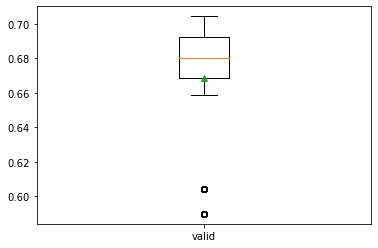

In [165]:
plt.boxplot([scores_valid], labels=['valid'], showmeans=True)
plt.show()

In [176]:
print('Validation')
print('Mean: ', np.mean(scores_valid), '  ----  Standard deviation: ', np.std(scores_valid))

Validation
Mean:  0.6687511345277642   ----  Standard deviation:  0.03389373828112887


# Saving results

In [172]:
results_rf = pd.DataFrame({'model': 'Random Forest', 'parameters': params, 'valid_score': scores_valid})
results_rf

,model,parameters,valid_score
0,Random Forest,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'splitter': 'best'}",0.589724
1,Random Forest,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'splitter': 'random'}",0.589724
2,Random Forest,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'splitter': 'best'}",0.589724
3,Random Forest,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'splitter': 'random'}",0.589724
4,Random Forest,"{'max_depth': 6, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'splitter': 'best'}",0.589724
...,...,...,...
1723,Random Forest,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 10, 'splitter': 'random'}",0.692469
1724,Random Forest,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 11, 'splitter': 'best'}",0.698252
1725,Random Forest,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 11, 'splitter': 'random'}",0.692469
1726,Random Forest,"{'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 12, 'splitter': 'best'}",0.698252


In [173]:
results_rf_bests = results_rf.sort_values(by=['valid_score'], ascending=False).iloc[:10]

In [174]:
results_rf_bests

,model,parameters,valid_score
562,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 6, 'splitter': 'best'}",0.704427
568,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 9, 'splitter': 'best'}",0.704427
574,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 12, 'splitter': 'best'}",0.704427
554,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 2, 'splitter': 'best'}",0.704427
572,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 11, 'splitter': 'best'}",0.704427
570,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 10, 'splitter': 'best'}",0.704427
552,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 1, 'splitter': 'best'}",0.704427
566,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 8, 'splitter': 'best'}",0.704427
564,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'splitter': 'best'}",0.704427
556,Random Forest,"{'max_depth': 7, 'max_leaf_nodes': 13, 'min_samples_leaf': 3, 'splitter': 'best'}",0.704427


In [175]:
results_rf_bests.to_csv("../models/decision_tree_results.csv", index=False)

# Dataset Balancing using RandomOverSample

In [146]:
ros = RandomOverSampler(random_state=SEED)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [147]:
# rus = RandomUnderSampler(random_state=SEED)
# X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [148]:
# sm = SMOTE(random_state=SEED)
# X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Training again the decision tree model with the best parameters

In [149]:
clf_final = DecisionTreeClassifier(criterion="entropy", 
                               max_depth=best_params["max_depth"],
                               #min_weight_fraction_leaf=best_params["min_weight_fraction_leaf"],
                               max_leaf_nodes=best_params["max_leaf_nodes"],
                               min_samples_leaf=best_params["min_samples_leaf"],
                               splitter=best_params["splitter"],
                               #max_features=best_params["max_features"],
                               random_state=SEED)


clf_final.fit(X_train_resampled, y_train_resampled)

print("Test score:", precision_score(y_test, clf_final.predict(X_test), average="micro"))
print(classification_report(y_test, clf_final.predict(X_test)))

Test score: 0.8443238249220464
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7652
           1       0.37      0.50      0.43      1007

    accuracy                           0.84      8659
   macro avg       0.65      0.70      0.67      8659
weighted avg       0.87      0.84      0.85      8659



# Confusion Matrix

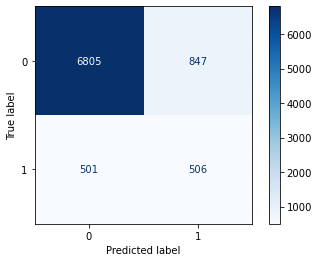

In [150]:
ConfusionMatrixDisplay.from_estimator(clf_final, X_test, y_test, cmap='Blues', values_format='d')

# Textual representation of the decision tree

In [152]:
feature_names_tmp = data_bank_preprocessed.columns

In [153]:
feature_names = feature_names_tmp.drop(['y', 'duration'])

In [154]:
text_representation = tree.export_text(clf_final, feature_names=list(feature_names.values))
# text_representation = tree.export_text(clf_final)
print(text_representation)

|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- housing <= 0.50
|   |   |   |--- month_aug <= 0.50
|   |   |   |   |--- month_jul <= 0.50
|   |   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |   |--- month_jan <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- month_jan >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- month_nov >  0.50
|   |   |   |   |   |   |--- day <= 16.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- day >  16.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- month_jul >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- month_aug >  0.50
|   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- housing >  0.50
|   |   |   |--- month_mar <= 0.50
|   |   |   |   |--- month_jun <= 0.50
|   |   |   |   |   |--- pdays <= 374.50
|   | 

- Without the duration feature

|--- poutcome_success <= 0.50
|   |--- class: 0

|--- poutcome_success >  0.50
|   |--- class: 1

- With the duration feature

|--- duration <= 365.50
|   |--- class: 0

|--- duration >  365.50
|   |--- class: 1


Text(0, 0.5, 'Feature')

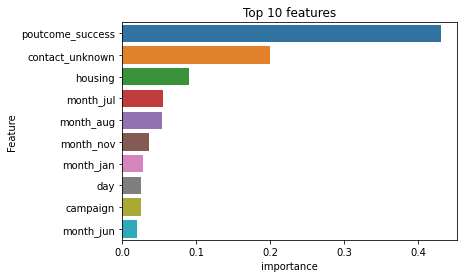

In [163]:
import seaborn as sns
importances = pd.DataFrame(clf_final.feature_importances_, index = feature_names,
                            columns=['importance']).sort_values('importance', ascending=False)

sns.barplot(y=importances.index[:10], x=importances['importance'][:10])
plt.title('Top 10 features')
plt.ylabel('Feature')

# Representation through diagrams

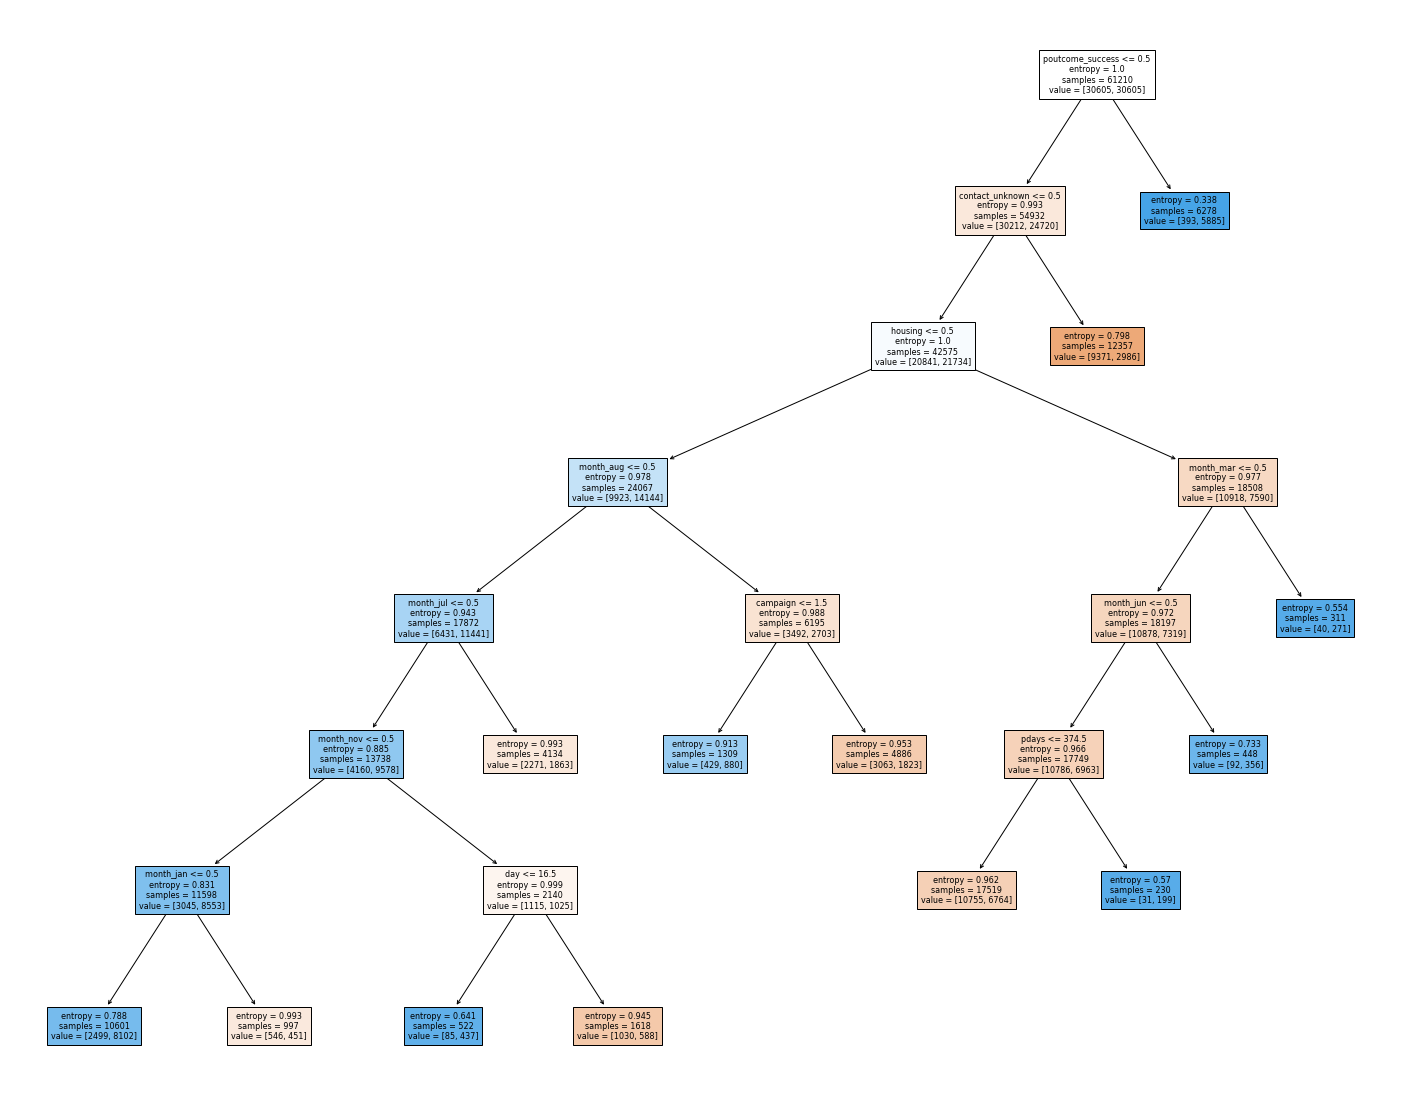

In [156]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_final, 
                   feature_names=list(feature_names.values),  
                   class_names=None,
                   filled=True, fontsize=8)


# Decision tree illustration

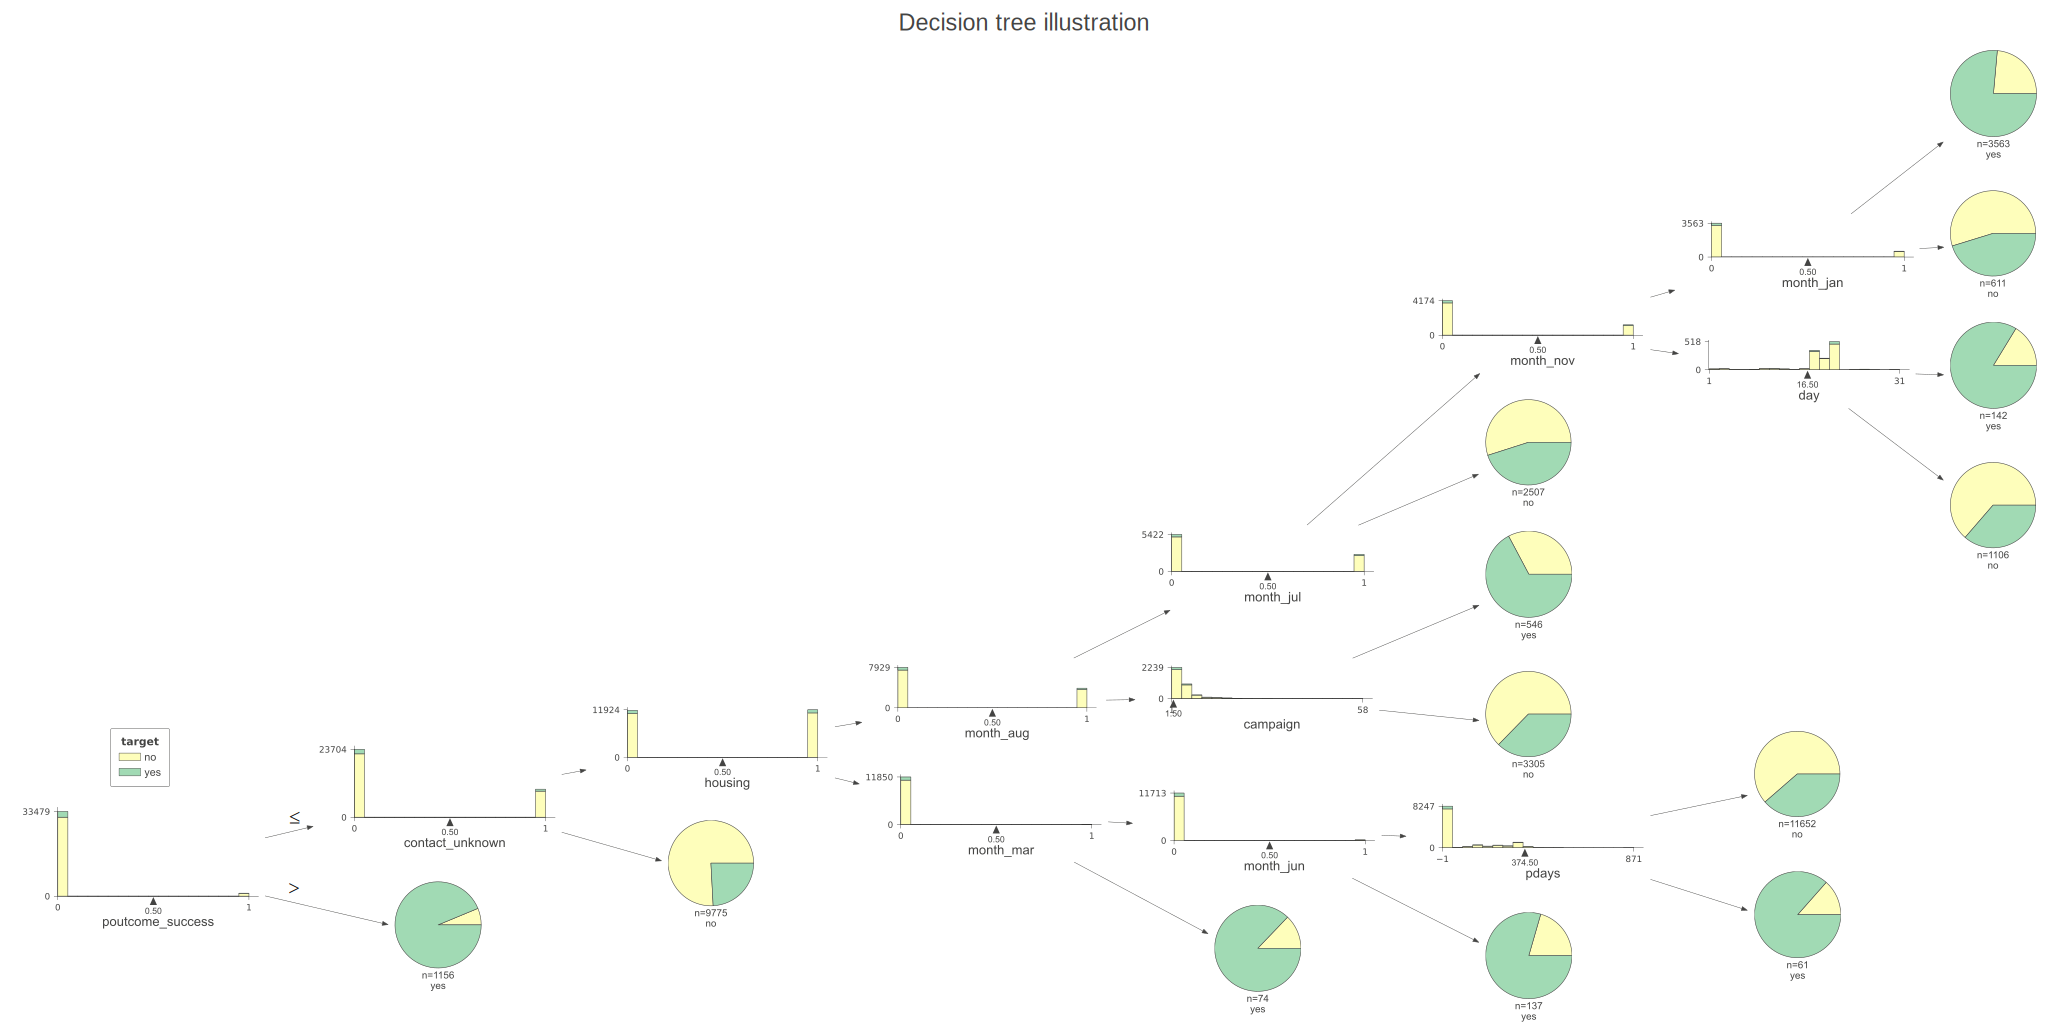

In [157]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(clf_final, X_train, y,
               target_name="target",
               fontname="Arial",
               title="Decision tree illustration",
               title_fontsize=16,
               orientation='LR',
               scale=1.6,
               feature_names=list(feature_names.values),
               class_names=target_names)

viz

# Exporting model

In [162]:
from joblib import dump, load
dump(clf_final, '../models/decision_tree.joblib') 

['../models/decision_tree.joblib']